# Capstone Project: English Premier League Predictions

# Part 2 Data Preparation, EDA & Feature Engineering

In this notebook, we will be combining all the fixtures dataset into one season, then merging the FIFA stats to it according to the seasons. 

The sequence will be as followed in the contents below.

### Contents: 
- [Combining the Datasets](#Combining-the-Datasets)
- [Feature Engineering for Match Stats](#Feature-Engineering-for-Match-Stats)
    - [Creating Past Matches Stats for Future Prediction](#Creating-Past-Matches-Stats-for-Future-Prediction)
    - [Creating the Result Feature for Each Rows](#Creating-the-Result-Feature-for-Each-Rows)
    - [Creating the Last 5 Matches Win, Lose or Draw and Accumulated Points during the Season](#Creating-the-Last-5-Matches-Win,-Lose-or-Draw-and-Accumulated-Points-during-the-Season)
    - [Creating Match Goals for Each Rows](#Creating-Match-Goals-for-Each-Rows)
    - [Creating Matches Played till Date since 2017/2018 Season](#Creating-Matches-Played-till-Date-since-2017/2018-Season)
- [Combining the Fixture Datasets with FIFA datasets](#Combining-the-Fixture-Datasets-with-FIFA-datasets)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Correlation Between All Features and Result](#Correlation-Between-All-Features-and-Result)
    - [Comparing Results and Total Goals](#Comparing-Results-and-Total-Goals)
    - [Goals Build Up Features](#Goals-Build-Up-Features)
    - [Home Total Goals and Past Matches Goals Features](#Home-Total-Goals-and-Past-Matches-Goals-Features)
    - [Away Total Goals and Past Matches Goals Features](#Away-Total-Goals-and-Past-Matches-Goals-Features)
    - [Additional Study: Past Three Season Champions - Liverpool VS Manchester City](#Additional-Study-:-Past-Three-Season-Champions---Liverpool-VS-Manchester-City)
    - [Season 2019/2020 Study](#Season-2019/2020-Study)

## Importing of Modules and Datasets

In [1]:
#Importing of modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('max_rows',None)
pd.set_option('max_columns',None)

In [2]:
#Reading in of all datasets
bpl_fifa18 = pd.read_csv('data/clean/bplteamstats2018_clean.csv')
bpl_fifa19 = pd.read_csv('data/clean/bplteamstats2019_clean.csv')
bpl_fifa20 = pd.read_csv('data/clean/bplteamstats2020_clean.csv')
bpl_fifa21 = pd.read_csv('data/clean/bplteamstats2021_clean.csv')

bpl_fixtures18 = pd.read_csv('data/clean/bpl2018_clean.csv')
bpl_fixtures19 = pd.read_csv('data/clean/bpl2019_clean.csv')
bpl_fixtures20 = pd.read_csv('data/clean/bpl2020_clean.csv')
bpl_fixtures21 = pd.read_csv('data/clean/bpl2021_clean.csv')

## Combining the Datasets

In this section, we will be combining all the datasets for the fixtures.

In [3]:
bpl_fifa18.head(2)

club  total_value_eur  total_wage_eur  average_age  \
0      Arsenal        434500000         2245000        26.28   
1  Bournemouth        115200000          970000        26.28   

   average_height_cm  average_weight_kg  average_overall  average_potential  \
0             181.11              75.56            81.11              83.94   
1             180.06              75.44            74.56              78.33   

   average_internationl_reputation  average_skill_moves  age_std  \
0                             2.72                 2.78     3.92   
1                             1.17                 2.78     4.07   

   height_cm_std  weight_kg_std  overall_std  potential_std  \
0           6.59           7.33         5.42           3.21   
1           7.10           7.14         3.15           3.69   

   international_reputation_std  skills_moves_std  
0                          0.96              0.81  
1                          0.51              0.73

In [4]:
bpl_fifa19.head(2)

club  total_value_eur  total_wage_eur  average_age  \
0      Arsenal        369000000         2020000        26.50   
1  Bournemouth        119000000          820000        26.38   

   average_height_cm  average_weight_kg  average_overall  average_potential  \
0             181.11              76.22            80.44              83.67   
1             181.12              75.25            75.44              77.94   

   average_internationl_reputation  average_skill_moves  age_std  \
0                             2.56                 3.00     4.23   
1                             1.12                 2.81     3.84   

   height_cm_std  weight_kg_std  overall_std  potential_std  \
0           5.17           5.76         5.02           2.25   
1           7.06           7.87         2.99           3.40   

   international_reputation_std  skills_moves_std  
0                          0.86              0.84  
1                          0.50              0.75

In [5]:
bpl_fifa20.head(2)

club  total_value_eur  total_wage_eur  average_age  \
0      Arsenal        378300000         1493000        24.78   
1  Aston Villa        126825000          665000        24.83   

   average_height_cm  average_weight_kg  average_overall  average_potential  \
0             181.44              75.78            79.33               85.0   
1             183.61              78.00            73.72               79.0   

   average_internationl_reputation  average_skill_moves  age_std  \
0                             2.28                 3.17     4.51   
1                             1.33                 2.89     3.50   

   height_cm_std  weight_kg_std  overall_std  potential_std  \
0           5.64           6.75         6.30           1.94   
1           6.69           8.83         3.91           4.37   

   international_reputation_std  skills_moves_std  
0                          1.07              0.86  
1                          0.59              0.76

In [6]:
bpl_fifa21.head(2)

club  total_value_eur  total_wage_eur  average_age  \
0      Arsenal        285300000         1287000        25.24   
1  Aston Villa        141370000          751000        24.89   

   average_height_cm  average_weight_kg  average_overall  average_potential  \
0             182.12              76.35            78.76              83.82   
1             183.00              75.22            74.00              79.00   

   average_internationl_reputation  average_skill_moves  age_std  \
0                             1.94                 3.12     4.22   
1                             1.22                 2.94     2.93   

   height_cm_std  weight_kg_std  overall_std  potential_std  \
0           5.56           5.96         4.45           2.81   
1           5.86           8.80         5.21           3.24   

   international_reputation_std  skills_moves_std  
0                          1.09              0.86  
1                          0.55              0.80

In [7]:
bpl_fixtures18.head(2)

Date                   Match         Home         Away  \
0  2017-09-09  Arsenal_vs_Bournemouth      Arsenal  Bournemouth   
1  2017-09-09  Arsenal_vs_Bournemouth  Bournemouth      Arsenal   

                    Stadium  Attendance  Gls  Ast  PK  PKatt  Sh  SoT  CrdY  \
0  Emirates Stadium, London       59262    3    3   0      0  16    8     0   
1  Emirates Stadium, London       59262    0    0   0      0   8    2     1   

   CrdR  Touches  Press   Tkl  Int_x  Blocks   xG  npxG   xA   SCA  GCA  \
0     0    717.0  169.0  18.0     19     8.0  1.7   1.7  1.0  27.0  6.0   
1     0    560.0  225.0   8.0     23    10.0  0.9   0.9  0.4  11.0  0.0   

     Cmp    Att  Prog  Carries  Prog.1  Succ  Att.1  2CrdY  Fls  Fld  Off  \
0  483.0  614.0  42.0    491.0    33.0   9.0   13.0      0   18    9    4   
1  313.0  445.0  23.0    352.0    35.0   7.0   15.0      0   11   15    0   

   Crs  TklW  PKwon  PKcon  OG  Recov   Won  Lost  
0   14    14      0      0   0   95.0   8.0  12.0  
1   18     4      0      0   0  108.0  12.0   8.0

In [8]:
bpl_fixtures19.head(2)

Date                   Match         Home         Away  \
0  2019-02-27  Arsenal_vs_Bournemouth      Arsenal  Bournemouth   
1  2019-02-27  Arsenal_vs_Bournemouth  Bournemouth      Arsenal   

                    Stadium  Attendance  Gls  Ast  PK  PKatt  Sh  SoT  CrdY  \
0  Emirates Stadium, London       59618    5    4   0      0  17    6     2   
1  Emirates Stadium, London       59618    1    1   0      0  13    5     2   

   CrdR  Touches  Press  Tkl  Int_x  Blocks   xG  npxG   xA  SCA  GCA  Cmp  \
0     0      790    155   10      8      14  3.0   3.0  3.0   32   10  604   
1     0      491    235   15      8      27  1.3   1.3  1.0   19    2  299   

   Att  Prog  Carries  Prog.1  Succ  Att.1  2CrdY  Fls  Fld  Off  Crs  TklW  \
0  692    38      612      68     4     10      0   11   11    4    9     7   
1  386    24      297      38     4      7      0   13   11    4    9    12   

   PKwon  PKcon  OG  Recov  Won  Lost  
0      0      0   0     76    8     8  
1      0      0   0     74    8     8

In [9]:
bpl_fixtures20.head(2)

Date                   Match         Home         Away  \
0  2019-09-22  Arsenal_vs_Aston_Villa      Arsenal  Aston Villa   
1  2019-09-22  Arsenal_vs_Aston_Villa  Aston Villa      Arsenal   

                    Stadium  Attendance  Gls  Ast  PK  PKatt  Sh  SoT  CrdY  \
0  Emirates Stadium, London       60331    3    0   1      1  20    4     7   
1  Emirates Stadium, London       60331    2    2   0      0  14    9     1   

   CrdR  Touches  Press   Tkl  Int_x  Blocks   xG  npxG   xA   SCA  GCA  \
0     1    604.0  121.0  18.0      7     3.0  2.2   1.5  0.7  34.0  4.0   
1     0    470.0  116.0  18.0      9    24.0  1.2   1.2  1.1  25.0  4.0   

     Cmp    Att  Prog  Carries  Prog.1  Succ  Att.1  2CrdY  Fls  Fld  Off  \
0  421.0  508.0  53.0    453.0    70.0  13.0   22.0      1   13   14    2   
1  275.0  352.0  29.0    307.0    44.0  13.0   15.0      0   15   14    0   

   Crs  TklW  PKwon  PKcon  OG  Recov  Won  Lost  
0   17    13    1.0    0.0   0   75.0  6.0   7.0  
1   23    12    0.0    1.0   0   68.0  7.0   6.0

In [10]:
bpl_fixtures21.head(2)

Date                   Match         Home         Away  \
0  2020-11-08  Arsenal_vs_Aston_Villa      Arsenal  Aston Villa   
1  2020-11-08  Arsenal_vs_Aston_Villa  Aston Villa      Arsenal   

                   Stadium  Attendance  Gls  Ast  PK  PKatt  Sh  SoT  CrdY  \
0  Emirates Stadium London           0    0    0   0      0  13    2     0   
1  Emirates Stadium London           0    2    2   0      0  17    5     0   

   CrdR  Touches  Press  Tkl  Int_x  Blocks   xG  npxG   xA  SCA  GCA  Cmp  \
0     0      666    113   11      2      20  1.5   1.5  0.6   17    0  473   
1     0      515    104   19      1      12  1.8   1.8  1.7   31    6  317   

   Att  Prog  Carries  Prog.1  Succ  Att.1  2CrdY  Fls  Fld  Off  Crs  TklW  \
0  566    38      503      64    11     15      0   14   15    1   22     7   
1  409    37      309      36    16     19      0   15   14    1   12    13   

   PKwon  PKcon  OG  Recov  Won  Lost  
0      0      0   1     91    9    18  
1      0      0   0     89   18     9

In [11]:
#Putting all df into a list for combination
df_list = [bpl_fixtures18,bpl_fixtures19,bpl_fixtures20,bpl_fixtures21]

In [12]:
#Functions that will be used
def combine_fixtures(df_list):
    '''
    Description: Combine all fixtures datasets together and sort them by 'date','match','home' and 'away'
    
    Input:
        - dataset
    Output: 
        - combined_fixtures dataset
        
    '''
    combined_fixtures = pd.concat(df_list,axis=0,ignore_index=True)
    combined_fixtures['Date'] = pd.to_datetime(combined_fixtures['Date'])
    combined_fixtures = combined_fixtures.sort_values(['Date','Match','Home','Away'])
    
    return combined_fixtures

In [13]:
#Combinig all fixtures data
combined_fixtures = combine_fixtures(df_list)

In [14]:
combined_fixtures.head(2)

Date                      Match            Home            Away  \
14 2017-08-11  Arsenal_vs_Leicester_City         Arsenal  Leicester City   
15 2017-08-11  Arsenal_vs_Leicester_City  Leicester City         Arsenal   

                     Stadium  Attendance  Gls  Ast  PK  PKatt  Sh  SoT  CrdY  \
14  Emirates Stadium, London       59387    4    4   0      0  28   10     0   
15  Emirates Stadium, London       59387    3    3   0      0   6    4     1   

    CrdR  Touches  Press   Tkl  Int_x  Blocks   xG  npxG   xA   SCA  GCA  \
14     0    782.0  162.0  20.0      9    11.0  2.2   2.2  2.2  51.0  7.0   
15     0    419.0  137.0  10.0      5    25.0  1.6   1.6  1.5   6.0  5.0   

      Cmp    Att  Prog  Carries  Prog.1  Succ  Att.1  2CrdY  Fls  Fld  Off  \
14  546.0  659.0  50.0    593.0    90.0  15.0   20.0      0    9   13    5   
15  179.0  305.0  16.0    184.0    24.0   1.0   11.0      0   13    9    3   

    Crs  TklW  PKwon  PKcon  OG  Recov   Won  Lost  
14   15    13    0.0    0.0   0  113.0  11.0   7.0  
15   20     6    0.0    0.0   0  104.0   7.0  11.0

## Feature Engineering for Match Stats

### Exploratory Data Analysis of Fixtures Match Stats


In [15]:
combined_fixtures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2648 entries, 14 to 2460
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2648 non-null   datetime64[ns]
 1   Match       2648 non-null   object        
 2   Home        2648 non-null   object        
 3   Away        2648 non-null   object        
 4   Stadium     2648 non-null   object        
 5   Attendance  2648 non-null   int64         
 6   Gls         2648 non-null   int64         
 7   Ast         2648 non-null   int64         
 8   PK          2648 non-null   int64         
 9   PKatt       2648 non-null   int64         
 10  Sh          2648 non-null   int64         
 11  SoT         2648 non-null   int64         
 12  CrdY        2648 non-null   int64         
 13  CrdR        2648 non-null   int64         
 14  Touches     2648 non-null   float64       
 15  Press       2648 non-null   float64       
 16  Tkl         2648 non-nu

Text(0.5, 1.0, 'Correlation between Features')

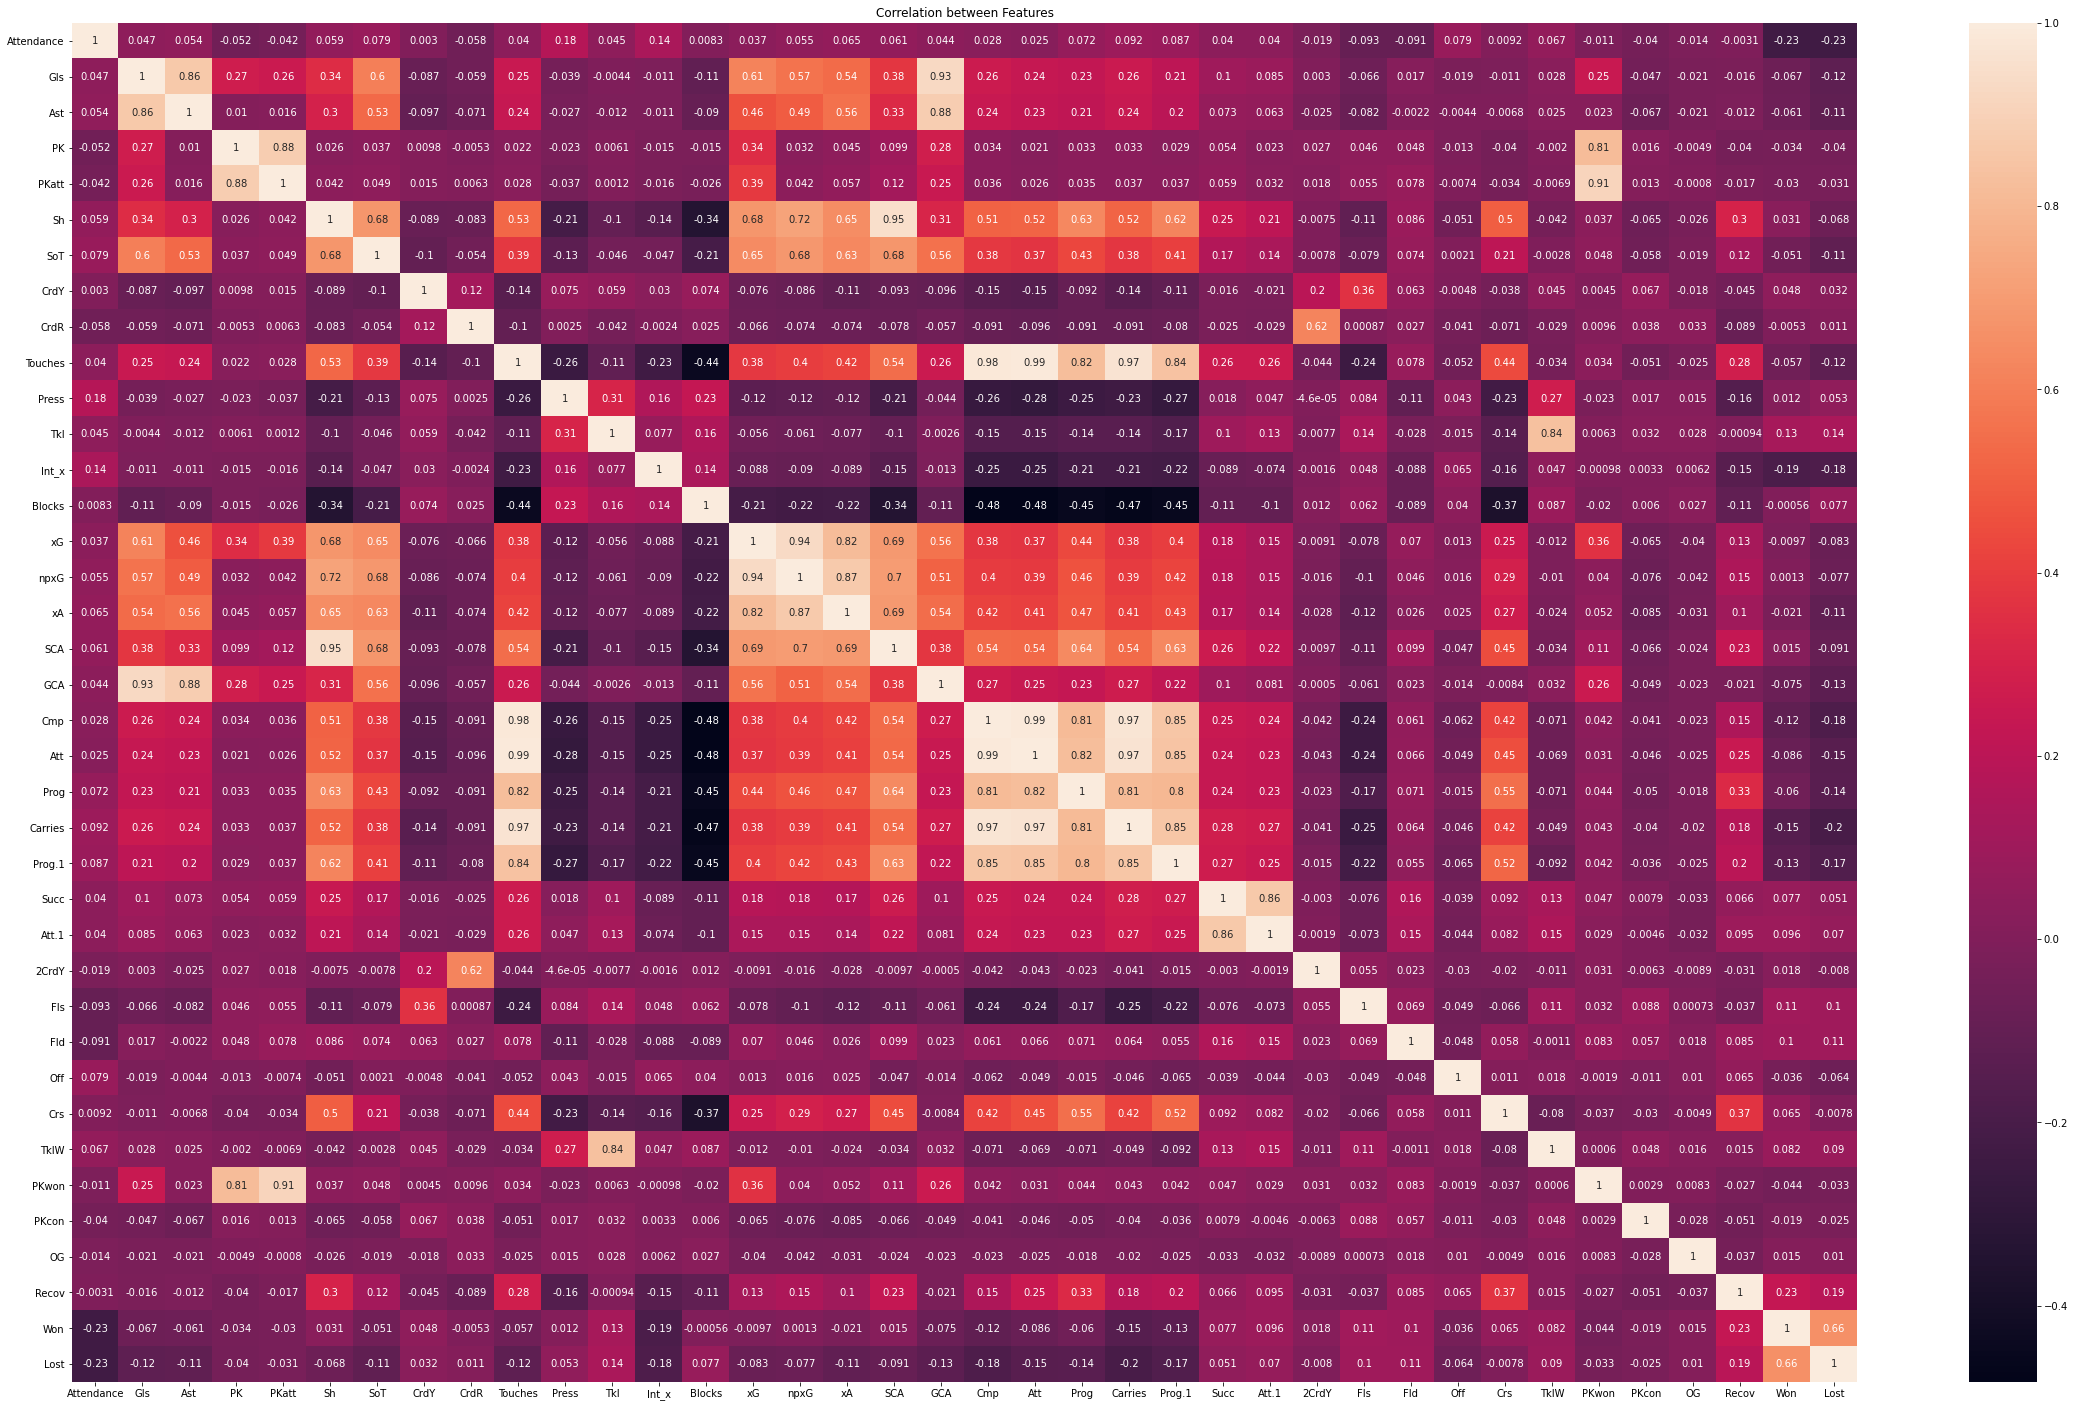

In [16]:
#Heatmap of all match stats. Looking for correlation 
plt.figure(figsize=(40,25))
sns.heatmap(combined_fixtures.corr(),annot=True)
plt.title('Correlation between Features')

The following are the statistics definition:

|No.|Stats| Description  |
|---|-----|--------------|
| 1 | Gls | Goals Scored |
| 2 | Ast |    Assists   |
| 3 | PK  |Penalty Kicks |
| 4 | PKatt |Penalty Kicks Attempted|
| 5 | Sh|Shots Total|
| 6 | SoT |Shots on Target|
| 7 | CrdY |   Yellow Card  |
| 8 | CrdR|    Red Card   |
| 9 | Touches|    Number of times the team have touched the ball   |
| 10 | Press |    Number of times the team have pressured when the ball is in the possession of the opponent  |
| 11 | Tkl |    Number of tackles |
| 12 | Int_x  |  Interceptions  |
| 13 | xG | Expected Goals  |
| 14 | npxG |    Non-penalty Expected Goals   |
| 15 | xA |    Expected Assists    |
| 16 | SCA |   Shots-Creating Actions   |
| 17 | GCA  |   Goals-Creating Actions  |
| 18 | Cmp |   Passes Completed   |
|19 | Att |Passes Attempted|
|20 | Prog |Progressive Passes|
|21 | Carries |Number of times the team controlled the ball with their feet|
|22|Prog.1|Progressive Carries, carries that move the ball towards the opponent's goals at least 5 yards, or into penalty area|
|23| Succ| Successful Dribble|
|24 | Att.1 |Dribbles Attempted|
|25 | 2CrdY |2nd Yellow Card in the game|
|26 | Fls |Fouls Committed|
|27|Fld |Fouls Drawn|
|28|Off|Offside|
|29|Crs|Crosses|
|30| TklW|Tackles Won|
|31| PKwon|Penalty Kick Won|
|32| PKcon|Penalty Kick Conceded|
|33|OG|Own Goals|
|34|Recov|Loose balls recovered|
|35| Won |Aerial balls won|
|36| Lost |Aerial balls lost|
|37| Block| Number of blocks on the ball by standing in its path|


Text(0, 0.5, 'Expect Non-Penalty Goal')

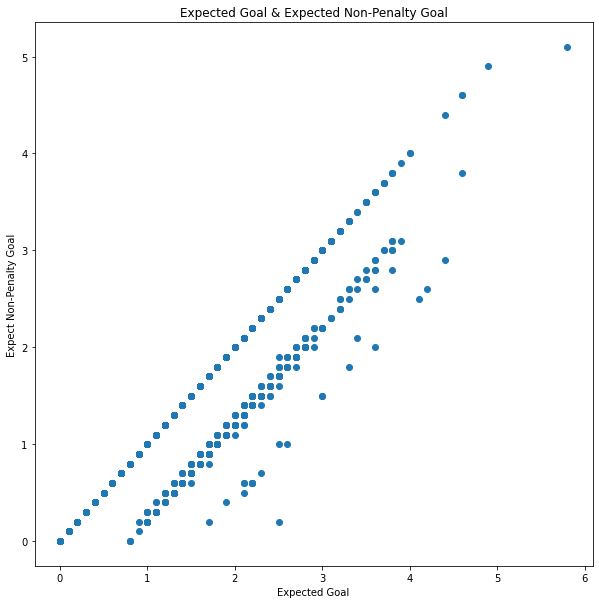

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(data=combined_fixtures,x='xG',y='npxG')
plt.title('Expected Goal & Expected Non-Penalty Goal')
plt.xlabel('Expected Goal')
plt.ylabel('Expect Non-Penalty Goal')

There is a moderate multicollinearity relationship between expected goal and expected non-penalty goal. I guess both are leading to expected goals, but however, penalty is not something that happens often. Therefore, I think both features are important.

In [18]:
def box_plotting(dataframe,list_of_columns,title,xlabel,ylabel):
    """function for box plot"""
    fig,ax = plt.subplots(figsize=(8,6))
    sns.boxplot(data = dataframe[list_of_columns],ax=ax,orient='h')
    
    ax.set_title(title) #setting of title
    ax.set_xlabel(xlabel) #setting of xlabel
    ax.set_ylabel(ylabel) #setting of ylabel
    ax.yaxis.grid(True) #enabling the grid

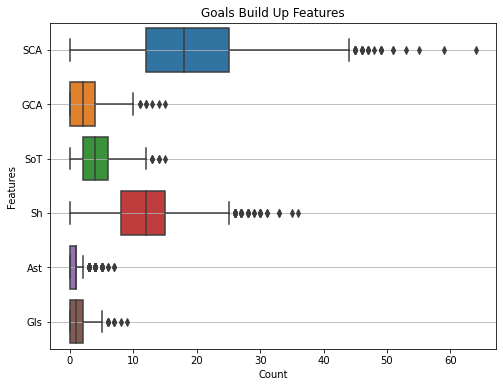

In [19]:
box_plotting(combined_fixtures,['SCA','GCA','SoT','Sh','Ast','Gls'],'Goals Build Up Features','Count','Features')

Above is a box plot of Shots Creating Actions(SCA), Goal Creating Actions(GCA), Shots on Target(SoT), Shots(Sh), Assist(Ast) and Goals(Gls).

Based on the goals build features and goal, there are of different ranges. The range of shot creating actions is larger than the rest. I assume that it is because the shots were created from shots creating actions and goals creating actions. Then shots will lead to shots on target or goals.

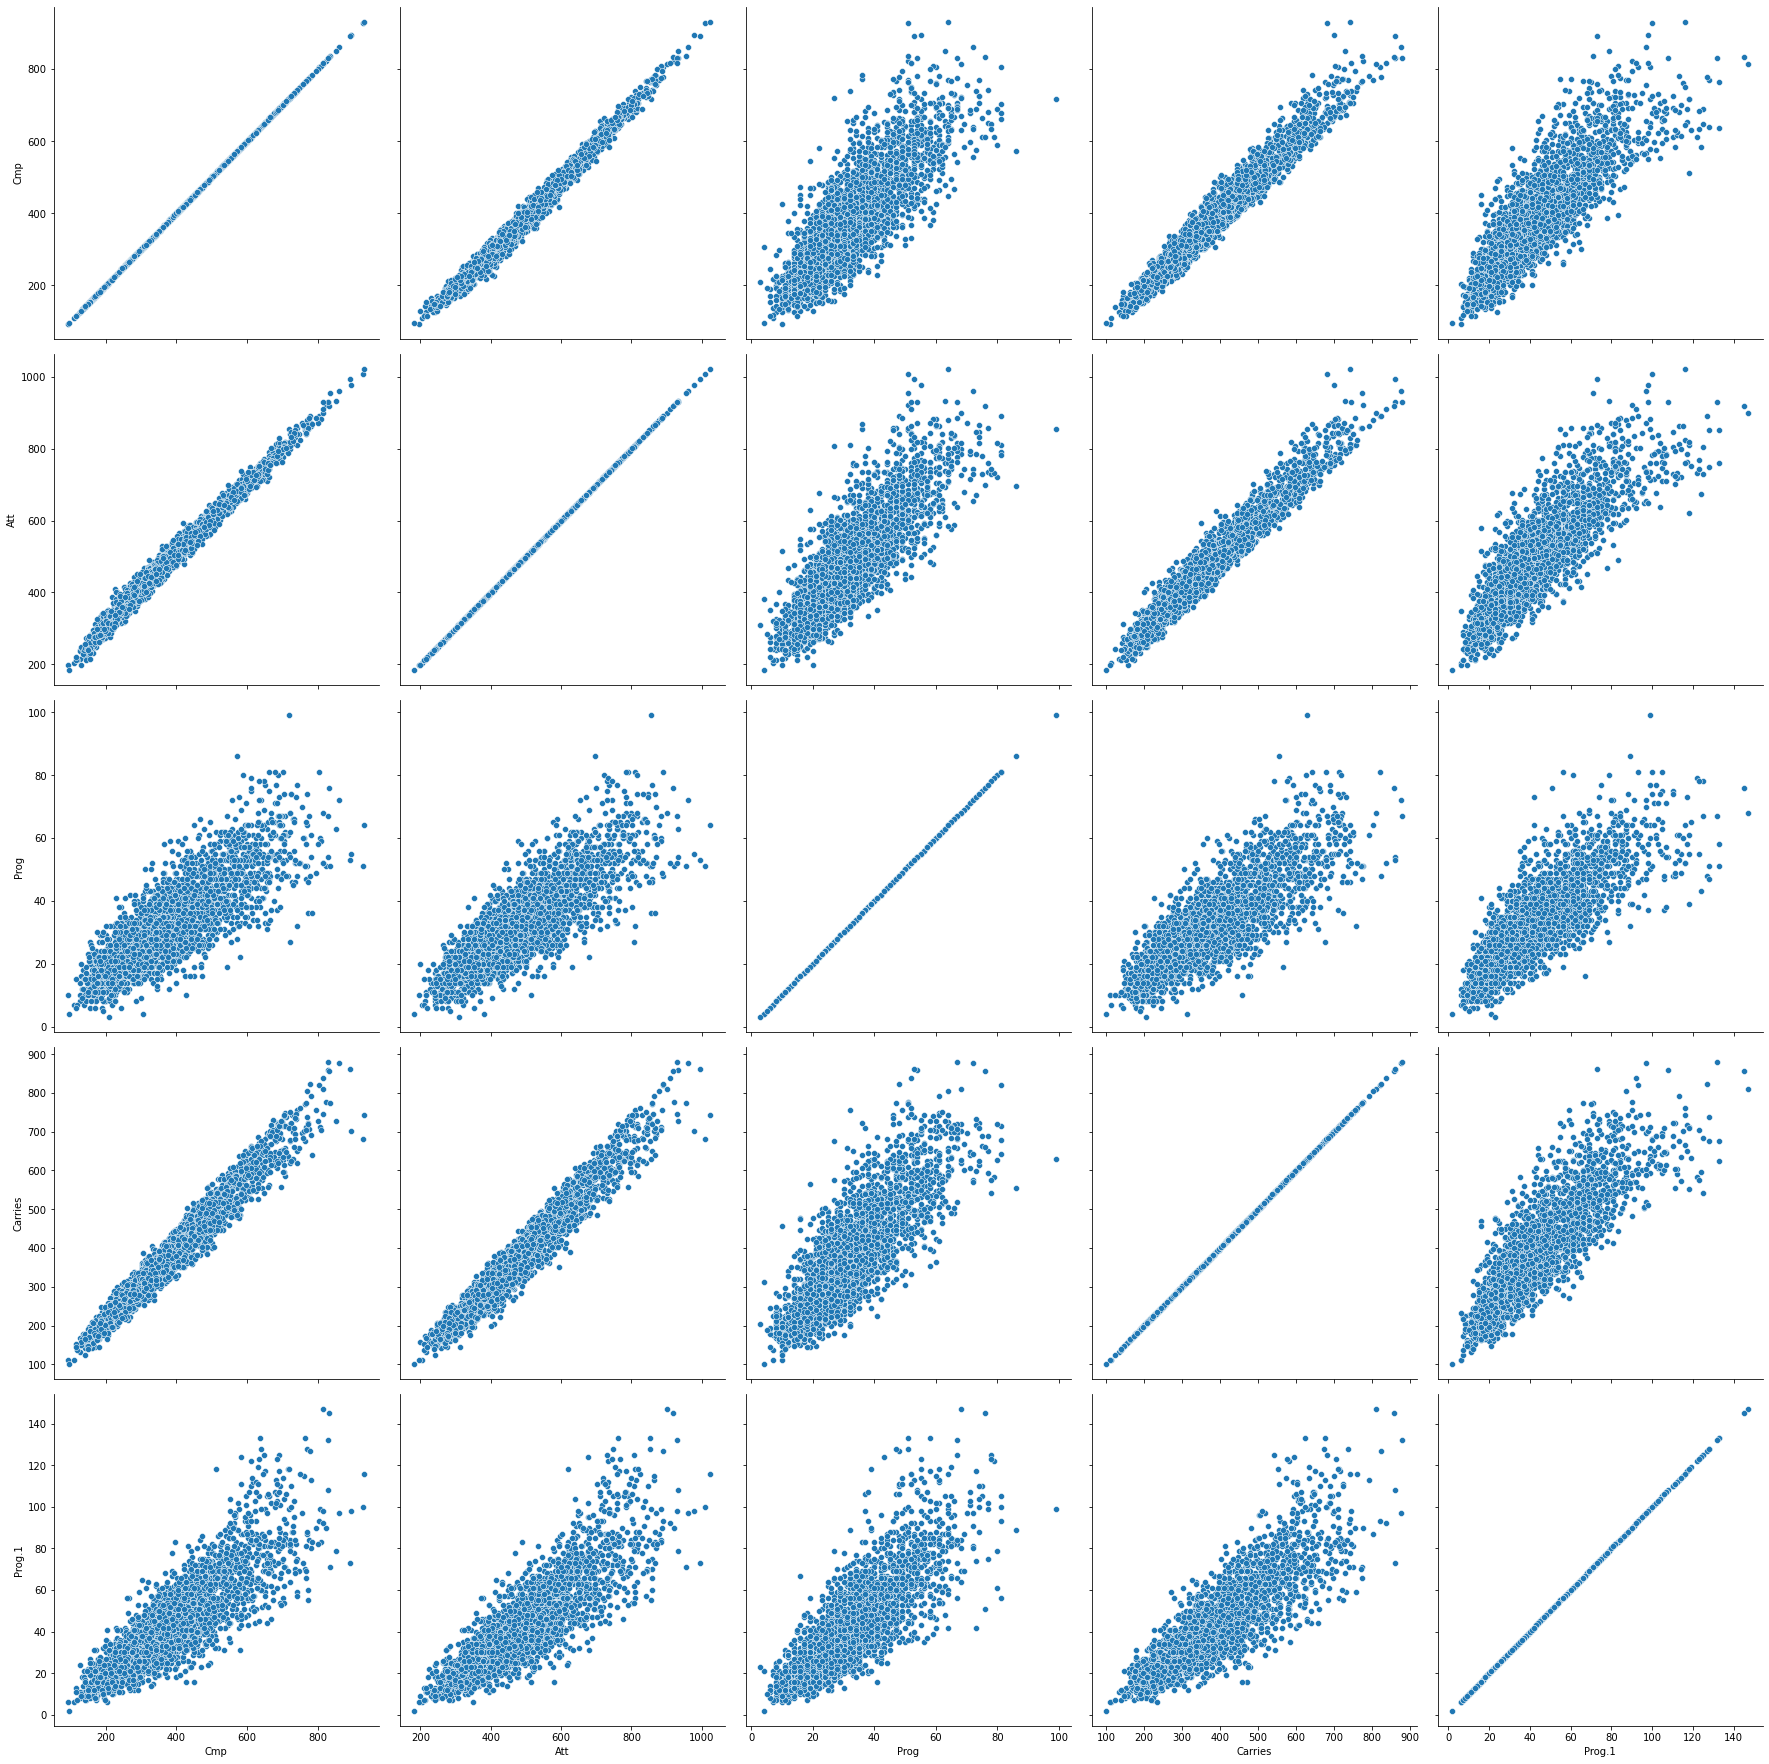

In [20]:
plot = sns.PairGrid(combined_fixtures,vars = ['Cmp','Att','Prog','Carries','Prog.1'],height=5)
plot.map(sns.scatterplot)

As there are positive correlation between these features, Passes Completed(Cmp), Passes Attempted(Att), Progressive Passes(Prog), Number of times the team controlled the ball (Carries) and Progressive Carries(Prog.1), we decide to look at the correlation. 

Based on the pair grid above, there is very strong correlation between carries and passes attempted. Similarly for carries and passes completed. I guess the reason behind it is that before a pass is carried out, the ball will be at the player's possession.

### Creating Past Matches Stats

As we do not have the stats for the next match as it have not been played, we will use an estimation on all statistics of the last 5 matches and last 3 matches. Based on them, we will make predictions. 

Statistics that will be averaged are:

|No.|Stats| Description  |
|---|-----|--------------|
| 1 | Gls | Goals Scored |
| 2 | Ast |    Assists   |
| 3 | PK  |Penalty Kicks |
| 4 | PKatt |Penalty Kicks Attempted|
| 5 | Sh|Shots Total|
| 6 | SoT |Shots on Target|
| 7 | CrdY |   Yellow Card  |
| 8 | CrdR|    Red Card   |
| 9 | Touches|    Number of times the team have touched the ball   |
| 10 | Press |    Number of times the team have pressured when the ball is in the possession of the opponent  |
| 11 | Tkl |    Number of tackles |
| 12 | Int_x  |  Interceptions  |
| 13 | xG | Expected Goals  |
| 14 | npxG |    Non-penalty Expected Goals   |
| 15 | xA |    Expected Assists    |
| 16 | SCA |   Shots-Creating Actions   |
| 17 | GCA  |   Goals-Creating Actions  |
| 18 | Cmp |   Passes Completed   |
|19 | Att |Passes Attempted|
|20 | Prog |Progressive Passes|
|21 | Carries |Number of times the team controlled the ball with their feet|
|22|Prog.1|Progressive Carries, carries that move the ball towards the opponent's goals at least 5 yards, or into penalty area|
|23| Succ| Successful Dribble|
|24 | Att.1 |Dribbles Attempted|
|25 | 2CrdY |2nd Yellow Card in the game|
|26 | Fls |Fouls Committed|
|27|Fld |Fouls Drawn|
|28|Off|Offside|
|29|Crs|Crosses|
|30| TklW|Tackles Won|
|31| PKwon|Penalty Kick Won|
|32| PKcon|Penalty Kick Conceded|
|33|OG|Own Goals|
|34|Recov|Loose balls recovered|
|35| Won |Aerial balls won|
|36| Lost |Aerial balls lost|
|37| Block| Number of blocks on the ball by standing in its path|


In [21]:
#function to create last 5 games and last 3 games stats
def average_last_5_stats(features,df):
    '''
    Description: Its picks a variable(str) and generates the 5 last games mean of this variable until the last game played.
    
    Input:
        - Variable (Str)
    Output: 
        - Last 5 games Variable Mean until the new game (Int)    
    '''
    #last_5_avg = pd.DataFrame()
    
    for f in features:
        feature = (df.groupby('Home')[f].
                   transform(lambda row: row.rolling(5, min_periods=1).
                             mean()
                             .shift(1))) # Shift the data down 1 so we don't leak data
        
        df["last_5_avrg_"+f] = feature # Add the new feature to the DataFrame

def average_last_3_stats(features,df):
    '''
    Description: Its picks a variable(str) and generates the 3 last games mean of this variable until the last game played.
    
    Input:
        - Variable (Str)
    Output: 
        - Last 3 games Variable Mean until the new game (Int)    
    '''
    #last_3_avg = pd.DataFrame()
    
    for f in features:
        feature = (df.groupby('Home')[f].
                   transform(lambda row: row.rolling(3, min_periods=1).
                             mean()
                             .shift(1))) # Shift the data down 1 so we don't leak data
        
        df["last_3_avrg_"+f] = feature # Add the new feature to the DataFrame


In [22]:
#match stats
col = ['Gls', 'Ast','PK', 'PKatt', 'Sh', 'SoT', 'CrdY', 'CrdR', 'Touches', 'Press', 'Tkl','Int_x', 'Blocks', 'xG',
       'xA', 'SCA', 'GCA', 'Cmp', 'Att','Prog', 'Carries', 'Prog.1', 'Succ', 'Att.1', '2CrdY', 'Fls', 'Fld', 'Off', 'Crs',
        'TklW', 'PKwon', 'PKcon', 'OG', 'Recov', 'Won','Lost']

#Generating last 5 match stats 
average_last_5_stats(col,combined_fixtures)

#Generating last 3 match stats
average_last_3_stats(col,combined_fixtures)

In [86]:
test2[['Match','last_3_avrg_Gls','last_5_avrg_Gls','last_3_avrg_Sh','last_5_avrg_Fls','last_3_avrg_Fld','last_5_avrg_PKwon']].sample(4)

Match  last_3_avrg_Gls  \
2602  West_Bromwich_Albion_vs_Leicester_City         0.666667   
2046                 Norwich_City_vs_Watford         0.333333   
1673                      Burnley_vs_Arsenal         1.333333   
1227              Manchester_City_vs_Chelsea         1.666667   

      last_5_avrg_Gls  last_3_avrg_Sh  last_5_avrg_Fls  last_3_avrg_Fld  \
2602              1.0       10.000000             15.0        10.000000   
2046              0.4        9.000000             13.6        11.000000   
1673              1.4        6.666667             14.8        14.333333   
1227              1.4       15.000000             10.0        11.000000   

      last_5_avrg_PKwon  
2602                0.0  
2046                0.0  
1673                0.0  
1227                0.2

In [23]:
test2 = combined_fixtures.sort_index(axis=0)
test2.tail()

Date                                            Match  \
2643 2020-11-23           Wolverhampton_Wanderers_vs_Southampton   
2644 2020-12-27     Wolverhampton_Wanderers_vs_Tottenham_Hotspur   
2645 2020-12-27     Wolverhampton_Wanderers_vs_Tottenham_Hotspur   
2646 2021-01-16  Wolverhampton_Wanderers_vs_West_Bromwich_Albion   
2647 2021-01-16  Wolverhampton_Wanderers_vs_West_Bromwich_Albion   

                         Home                     Away  \
2643              Southampton  Wolverhampton Wanderers   
2644  Wolverhampton Wanderers        Tottenham Hotspur   
2645        Tottenham Hotspur  Wolverhampton Wanderers   
2646  Wolverhampton Wanderers     West Bromwich Albion   
2647     West Bromwich Albion  Wolverhampton Wanderers   

                             Stadium  Attendance  Gls  Ast  PK  PKatt  Sh  \
2643  Molineux Stadium Wolverhampton           0    1    1   0      0   7   
2644  Molineux Stadium Wolverhampton           0    1    1   0      0  11   
2645  Molineux Stadium Wolverhampton           0    1    1   0      0   7   
2646  Molineux Stadium Wolverhampton           0    2    1   0      0  24   
2647  Molineux Stadium Wolverhampton           0    3    1   2      2  10   

      SoT  CrdY  CrdR  Touches  Press   Tkl  Int_x  Blocks   xG  npxG   xA  \
2643    2     0     0    660.0  129.0  18.0      6    24.0  1.5   1.5  1.5   
2644    6     4     0    694.0  132.0  21.0      8    14.0  0.9   0.9  0.7   
2645    3     1     0    600.0  113.0  11.0     22    13.0  0.4   0.4  0.4   
2646    7     2     0    710.0   99.0  12.0      9    11.0  2.2   2.2  1.6   
2647    3     1     0    422.0  171.0  16.0      9    27.0  2.2   0.6  0.1   

       SCA  GCA    Cmp    Att  Prog  Carries  Prog.1  Succ  Att.1  2CrdY  Fls  \
2643  13.0  2.0  441.0  543.0  29.0    376.0    45.0  11.0   22.0      0   17   
2644  18.0  2.0  478.0  586.0  39.0    468.0    61.0  17.0   25.0      0   24   
2645  12.0  1.0  377.0  471.0  32.0    381.0    32.0   9.0   13.0      0   16   
2646  36.0  1.0  494.0  600.0  43.0    421.0    71.0  20.0   27.0      0   10   
2647  18.0  6.0  194.0  297.0  22.0    181.0    24.0   5.0    9.0      0   21   

      Fld  Off  Crs  TklW  PKwon  PKcon  OG  Recov   Won  Lost  \
2643   17    1   11    14    0.0    0.0   0   89.0  15.0  23.0   
2644   16    2   23    13    0.0    0.0   0   94.0  18.0  23.0   
2645   24    0    7     7    0.0    0.0   0   75.0  23.0  18.0   
2646   21    0   16     7    0.0    2.0   0   98.0  33.0  21.0   
2647    9    2    7     9    2.0    0.0   0   75.0  21.0  33.0   

      last_5_avrg_Gls  last_5_avrg_Ast  last_5_avrg_PK  last_5_avrg_PKatt  \
2643              2.6              1.6             0.0                0.0   
2644              1.0              0.4             0.2                0.2   
2645              0.8              0.8             0.0                0.0   
2646              1.0              0.6             0.4                0.4   
2647              0.2              0.2             0.0                0.0   

      last_5_avrg_Sh  last_5_avrg_SoT  last_5_avrg_CrdY  last_5_avrg_CrdR  \
2643            12.4              6.0               1.4               0.0   
2644            12.4              4.2               2.4               0.2   
2645             8.4              3.2               1.6               0.0   
2646            11.2              3.8               1.8               0.0   
2647             4.4              1.8               1.2               0.2   

      last_5_avrg_Touches  last_5_avrg_Press  last_5_avrg_Tkl  \
2643                653.0              146.2             23.2   
2644                551.8              105.6             13.2   
2645                531.2              170.8             20.6   
2646                632.6              118.4             15.8   
2647                410.6              144.2             14.4   

      last_5_avrg_Int_x  last_5_avrg_Blocks  last_5_avrg_xG  last_5_avrg_xA  \
2643                7.8                14

In [24]:
def combine_home_away(df):
    '''
    Description: Combine same fixtures into one row
    
    Input:
        - Dataset
    Output: 
        - Dataset with fixtures that are combined accordingly to matches, dates and teams  
    '''
    away = df.iloc[1::2]
    home = df.iloc[::2]
    combined_1 = pd.merge(home,away,how='outer',on = ['Date','Match'],)
    
    combined_2 = combined_1.sort_values('Date')
    combined_2.columns = map(str.lower, combined_2.columns)
    combined_2.drop(columns=['away_y','away_x','attendance_y','stadium_y'],inplace= True)

    return combined_2

In [25]:
test3 = combine_home_away(test2)
test3.shape

(1324, 224)

In [26]:
test3.sample(10)

date                                  match             home_x  \
268  2018-02-10   Stoke_City_vs_Brighton_&_Hove_Albion         Stoke City   
249  2018-01-31  Southampton_vs_Brighton_&_Hove_Albion        Southampton   
871  2020-07-04                     Chelsea_vs_Watford            Chelsea   
335  2018-05-05            Watford_vs_Newcastle_United            Watford   
884  2020-07-16    Crystal_Palace_vs_Manchester_United     Crystal Palace   
229  2017-11-04        Newcastle_United_vs_Bournemouth   Newcastle United   
1246 2020-11-08           Manchester_City_vs_Liverpool    Manchester City   
1149 2020-11-29     Arsenal_vs_Wolverhampton_Wanderers            Arsenal   
147  2018-03-10      Huddersfield_Town_vs_Swansea_City  Huddersfield Town   
376  2017-09-30        West_Ham_United_vs_Swansea_City    West Ham United   

                                   stadium_x  attendance_x  gls_x  ast_x  \
268           Bet365 Stadium, Stoke-on-Trent         29876      1      1   
249          St. Mary's Stadium, Southampton         30034      1      0   
871                   Stamford Bridge London             0      3      2   
335           Vicarage Road Stadium, Watford         20375      2      2   
884                     Selhurst Park London             0      0      0   
229     St. James' Park, Newcastle upon Tyne         52237      0      0   
1246               Etihad Stadium Manchester             0      1      1   
1149                 Emirates Stadium London             0      1      1   
147   The John Smith's Stadium, Huddersfield         23567      0      0   
376                   London Stadium, London         56922      1      1   

      pk_x  pkatt_x  sh_x  sot_x  crdy_x  crdr_x  touches_x  press_x  tkl_x  \
268      0        1    16      1       0       0      645.0    153.0   12.0   
249      0        0    18      3       3       0      755.0    117.0   11.0   
871      1        1    20      8       0       0      874.0     78.0   14.0   
335      0        1    10      7       2       0      518.0     87.0   12.0   
884      0        0    13      5       1       0      571.0    175.0   25.0   
229      0        0    14      5       2       0      518.0     87.0   16.0   
1246     0        1     6      2       3       0      675.0    115.0   12.0   
1149     0        0    13      2       3       0      641.0    115.0   10.0   
147      0        0    31      4       2       0      855.0    117.0    9.0   
376      0        0     9      4       3       0      548.0    268.0   19.0   

      int_x_x  blocks_x  xg_x  npxg_x  xa_x  sca_x  gca_x  cmp_x  att_x  \
268        19      14.0   1.5     0.7   0.6   24.0    1.0  372.0  530.0   
249         3      18.0   1.3     1.3   0.8   24.0    2.0  522.0  654.0   
871         1      13.0   2.2     1.4   1.1   32.0    6.0  677.0  764.0   
335        16      14.0   2.4     1.5   1.2   17.0    4.0  296.0  399.0   
884         7      19.0   0.8     0.8   0.6   18.0    0.0  365.0  462.0   
229        15      18.0   0.5     0.5   0.5   19.0    0.0  286.0  415.0   
1246        7      13.0   1.6     0.8   0.8   12.0    2.0  496.0  582.0   
1149        8      21.0   1.0     1.0   0.7   18.0    2.0  445.0  547.0   
147         6       9.0   2.1     2.1   1.6   53.0    0.0  636.0  761.0   
376        10      15.0   0.5     0.5   0.4   18.0    2.0  323.0  434.0   

      prog_x  carries_x  prog.1_x  succ_x  att.1_x  2crdy_x  fls_x  fld_x  \
268     40.0      419.0      56.0    11.0     18.0        0      9     11   
249     48.0      577.0      73.0    19.0     22.0        0      8     12   
871     40.0      615.0      83.0     7.0     11.0        0     13     14   
335     26.0      309.0      25.0     6.0     11.0        0      8     12   
884     30.0      356.0      49.0    12.0     19.0        0     13     16   
229     27.0      309.0      41.0     4.0      6.0        0     12     13   
1246    33.0      509.0      42.0     6.0     15.0        0     21     10   
1149    52.0  

In [27]:
#all features to be renamed for home and away
#last 5 average stats
#last 3 average stats
def rename_features_home_away(df):
    df = df.sort_values('date')
    new_features =  {'home_x':'home','gls_x':'h_gls','ast_x':'h_ast', 'pk_x':'h_pk',
    'pkatt_x':'h_pkatt', 'sh_x':'h_sh','sot_x':'h_sot', 'crdy_x':'h_yellow', '2crdy_x' : 'h_yellow2',
    'crdr_x':'h_red', 'crs_x':'h_crs', 'touches_x':'h_touches','press_x':'h_press','tkl_x':'h_tkl','int_x_x':'h_int',
    'blocks_x':'h_blk','xg_x':'h_xg','npxg_x':'h_npxg','xa_x':'h_xa','sca_x':'h_sca','gca_x':'h_gca',
    'cmp_x':'h_cmp','att_x':'h_pass_att','prog_x':'h_pass_prog','carries_x':'h_carries','prog.1_x':'h_carries_prog',
    'succ_x':'h_dri_succ','att.1_x':'h_dri_att','fls_x':'h_fls','fld_x':'h_fld','off_x':'h_off', 'crs_x':'h_crs',
    'tklw_x':'h_tklw', 'pkwon_x':'h_pkwon', 'pkcon_x' : 'h_pkcon','og_x':'h_og','recov_x':'h_recov','won_x':'h_aer_won',
    'lost_x':'h_aer_lost',
    #last 5 average stats
    'last_5_avrg_gls_x':'h_last_5_avrg_gls','last_5_avrg_ast_x':'h_last_5_avrg_ast',
    'last_5_avrg_pk_x':'h_last_5_avrg_pk','last_5_avrg_pkatt_x':'h_last_5_avrg_pkatt','last_5_avrg_sh_x':'h_last_5_avrg_sh',
    'last_5_avrg_sot_x': 'h_last_5_avrg_sot','last_5_avrg_crdy_x':'h_last_5_avrg_yellow','last_5_avrg_crdr_x':'h_last_5_avrg_red',
    'last_5_avrg_touches_x':'h_last_5_touches','last_5_avrg_press_x':'h_last_5_avrg_press','last_5_avrg_tkl_x':'h_last_5_avrg_tkl',
    'last_5_avrg_int_x_x':'h_last_5_avrg_int','last_5_avrg_blocks_x':'h_last_5_avrg_blk','last_5_avrg_xg_x':'h_last_5_avrg_xg',
    'last_5_avrg_npxg_x':'h_last_5_avrg_npxg','last_5_avrg_xa_x':'h_last_5_avrg_xa','last_5_avrg_sca_x':'h_last_5_avrg_sca',
    'last_5_avrg_gca_x':'h_last_5_avrg_gca','last_5_avrg_cmp_x':'h_last_5_avrg_cmp','last_5_avrg_att_x':'h_last_5_avrg_pass_att',
    'last_5_avrg_prog_x':'h_last_5_avrg_pass_prog','last_5_avrg_carries_x':'h_last_5_avrg_carries','last_5_avrg_prog.1_x':'h_last_5_avrg_carries_prog',
    'last_5_avrg_succ_x':'h_last_5_avrg_dri_succ','last_5_avrg_att.1_x':'h_last_5_avrg_dri_att','last_5_avrg_2crdy_x':'h_last_5_avrg_yellow2',
    'last_5_avrg_fls_x':'h_last_5_avrg_fls','last_5_avrg_fld_x':'h_last_5_avrg_fld','last_5_avrg_off_x':'h_last_5_avrg_off',
    'last_5_avrg_crs_x':'h_last_5_avrg_crs','last_5_avrg_tklw_x':'h_last_5_avrg_tklw','last_5_avrg_pkwon_x':'h_last_5_avrg_pkwon',
    'last_5_avrg_pkcon_x':'h_last_5_avrg_pkcon', 'last_5_avrg_og_x': 'h_last_5_avrg_og', 'last_5_avrg_recov_x':'h_last_5_avrg_recov',
    'last_5_avrg_won_x':'h_last_5_avrg_aer_won','last_5_avrg_lost_x':'h_last_5_avrg_aer_lost',
    #last 3 average stats
    'last_3_avrg_gls_x':'h_last_3_avrg_gls','last_3_avrg_ast_x':'h_last_3_avrg_ast',
    'last_3_avrg_pk_x':'h_last_3_avrg_pk','last_3_avrg_pkatt_x':'h_last_3_avrg_pkatt','last_3_avrg_sh_x':'h_last_3_avrg_sh',
    'last_3_avrg_sot_x': 'h_last_3_avrg_sot','last_3_avrg_crdy_x':'h_last_3_avrg_yellow','last_3_avrg_crdr_x':'h_last_3_avrg_red',
    'last_3_avrg_touches_x':'h_last_3_touches','last_3_avrg_press_x':'h_last_3_avrg_press','last_3_avrg_tkl_x':'h_last_3_avrg_tkl',
    'last_3_avrg_int_x_x':'h_last_3_avrg_int','last_3_avrg_blocks_x':'h_last_3_avrg_blk','last_3_avrg_xg_x':'h_last_3_avrg_xg',
    'last_3_avrg_npxg_x':'h_last_3_avrg_npxg','last_3_avrg_xa_x':'h_last_3_avrg_xa','last_3_avrg_sca_x':'h_last_3_avrg_sca',
    'last_3_avrg_gca_x':'h_last_3_avrg_gca','last_3_avrg_cmp_x':'h_last_3_avrg_cmp','last_3_avrg_att_x':'h_last_3_avrg_pass_att',
    'last_3_avrg_prog_x':'h_last_3_avrg_pass_prog','last_3_avrg_carries_x':'h_last_3_avrg_carries','last_3_avrg_prog.1_x':'h_last_3_avrg_carries_prog',
    'last_3_avrg_succ_x':'h_last_3_avrg_dri_succ','last_3_avrg_att.1_x':'h_last_3_avrg_dri_att','last_3_avrg_2crdy_x':'h_last_3_avrg_yellow2',
    'last_3_avrg_fls_x':'h_last_3_avrg_fls','last_3_avrg_fld_x':'h_last_3_avrg_fld','last_3_avrg_off_x':'h_last_3_avrg_off',
    'last_3_avrg_crs_x':'h_last_3_avrg_crs','last_3_avrg_tklw_x':'h_last_3_avrg_tklw','last_3_avrg_pkwon_x':'h_last_3_avrg_pkwon',
    'last_3_avrg_pkcon_x':'h_last_3_avrg_pkcon', 'last_3_avrg_og_x': 'h_last_3_avrg_og', 'last_3_avrg_recov_x':'h_last_3_avrg_recov',
    'last_3_avrg_won_x':'h_last_3_avrg_aer_won','last_3_avrg_lost_x':'h_last_3_avrg_aer_lost',
    #away features
    'home_y':'away','gls_y':'a_gls','ast_y':'a_ast', 'pk_y':'a_pk','pkatt_y':'a_pkatt','sh_y':'a_sh', 
    'sot_y':'a_sot','crdy_y':'a_yellow', '2crdy_y' : 'a_yellow2','crdr_y':'a_red', 'crs_y':'a_crs', 'touches_y':'a_touches',
    'press_y':'a_press','tkl_y':'a_tkl','int_x_y':'a_int','blocks_y':'a_blk','xg_y':'a_xg','npxg_y':'a_npxg','xa_y':'a_xa',
    'sca_y':'a_sca','gca_y':'a_gca', 'cmp_y':'a_cmp','att_y':'a_pass_att','prog_y':'a_pass_prog','carries_y':'a_carries',
    'prog.1_y':'a_carries_prog','succ_y':'a_dri_succ','att.1_y':'a_dri_att','fls_y':'a_fls','fld_y':'a_fld','off_y':'a_off', 
    'crs_y':'a_crs','tklw_y':'a_tklw', 'pkwon_y':'a_pwon', 'pkcon_y' : 'a_pkcon','og_y':'a_og','recov_y':'a_recov','won_y':'a_aer_won',
    'lost_y':'a_aer_lost','attendance_x':'attendance','stadium_x':'stadium',
    #last 5 average stats
    'last_5_avrg_gls_y':'a_last_5_avrg_gls',
    'last_5_avrg_ast_y':'a_last_5_avrg_ast', 'last_5_avrg_pk_y':'a_last_5_avrg_pk','last_5_avrg_pkatt_y':'a_last_5_avrg_pkatt',
    'last_5_avrg_sh_y':'a_last_5_avrg_sh', 'last_5_avrg_sot_y': 'a_last_5_avrg_sot','last_5_avrg_crdy_y':'a_last_5_avrg_yellow',
    'last_5_avrg_crdr_y':'a_last_5_avrg_red','last_5_avrg_touches_y':'a_last_5_touches','last_5_avrg_press_y':'a_last_5_avrg_press',
    'last_5_avrg_tkl_y':'a_last_5_avrg_tkl','last_5_avrg_int_x_y':'a_last_5_avrg_int','last_5_avrg_blocks_y':'a_last_5_avrg_blk',
    'last_5_avrg_xg_y':'a_last_5_avrg_xg','last_5_avrg_npxg_y':'a_last_5_avrg_npxg','last_5_avrg_xa_y':'a_last_5_avrg_xa','last_5_avrg_sca_y':'a_last_5_avrg_sca',       
    'last_5_avrg_gca_y':'a_last_5_avrg_gca', 'last_5_avrg_cmp_y':'a_last_5_avrg_cmp','last_5_avrg_att_y':'a_last_5_avrg_pass_att',
    'last_5_avrg_prog_y':'a_last_5_avrg_pass_prog','last_5_avrg_carries_y':'a_last_5_avrg_carries','last_5_avrg_prog.1_y':'a_last_5_avrg_carries_prog',
    'last_5_avrg_succ_y':'a_last_5_avrg_dri_succ','last_5_avrg_att.1_y':'a_last_5_avrg_dri_att','last_5_avrg_2crdy_y':'a_last_5_avrg_yellow2',
    'last_5_avrg_fls_y':'a_last_5_avrg_fls','last_5_avrg_fld_y':'a_last_5_avrg_fld','last_5_avrg_off_y':'a_last_5_avrg_off',
    'last_5_avrg_crs_y':'a_last_5_avrg_crs','last_5_avrg_tklw_y':'a_last_5_avrg_tklw','last_5_avrg_pkwon_y':'a_last_5_avrg_pkwon',
    'last_5_avrg_pkcon_y':'a_last_5_avrg_pkcon', 'last_5_avrg_og_y': 'a_last_5_avrg_og', 'last_5_avrg_recov_y':'a_last_5_avrg_recov',
    'last_5_avrg_won_y':'a_last_5_avrg_aer_won','last_5_avrg_lost_y':'a_last_5_avrg_aer_lost',
    #last 3 average stats               
    'last_3_avrg_gls_y':'a_last_3_avrg_gls',
    'last_3_avrg_ast_y':'a_last_3_avrg_ast', 'last_3_avrg_pk_y':'a_last_3_avrg_pk','last_3_avrg_pkatt_y':'a_last_3_avrg_pkatt',
    'last_3_avrg_sh_y':'a_last_3_avrg_sh', 'last_3_avrg_sot_y': 'a_last_3_avrg_sot','last_3_avrg_crdy_y':'a_last_3_avrg_yellow',
    'last_3_avrg_crdr_y':'a_last_3_avrg_red','last_3_avrg_touches_y':'a_last_3_touches','last_3_avrg_press_y':'a_last_3_avrg_press',
    'last_3_avrg_tkl_y':'a_last_3_avrg_tkl','last_3_avrg_int_x_y':'a_last_3_avrg_int','last_3_avrg_blocks_y':'a_last_3_avrg_blk',
    'last_3_avrg_xg_y':'a_last_3_avrg_xg','last_3_avrg_npxg_y':'a_last_3_avrg_npxg','last_3_avrg_xa_y':'a_last_3_avrg_xa','last_3_avrg_sca_y':'a_last_3_avrg_sca',       
    'last_3_avrg_gca_y':'a_last_3_avrg_gca', 'last_3_avrg_cmp_y':'a_last_3_avrg_cmp','last_3_avrg_att_y':'a_last_3_avrg_pass_att',
    'last_3_avrg_prog_y':'a_last_3_avrg_pass_prog','last_3_avrg_carries_y':'a_last_3_avrg_carries','last_3_avrg_prog.1_y':'a_last_3_avrg_carries_prog',
    'last_3_avrg_succ_y':'a_last_3_avrg_dri_succ','last_3_avrg_att.1_y':'a_last_3_avrg_dri_att','last_3_avrg_2crdy_y':'a_last_3_avrg_yellow2',
    'last_3_avrg_fls_y':'a_last_3_avrg_fls','last_3_avrg_fld_y':'a_last_3_avrg_fld','last_3_avrg_off_y':'a_last_3_avrg_off',
    'last_3_avrg_crs_y':'a_last_3_avrg_crs','last_3_avrg_tklw_y':'a_last_3_avrg_tklw','last_3_avrg_pkwon_y':'a_last_3_avrg_pkwon',
    'last_3_avrg_pkcon_y':'a_last_3_avrg_pkcon', 'last_3_avrg_og_y': 'a_last_3_avrg_og', 'last_3_avrg_recov_y':'a_last_3_avrg_recov',
    'last_3_avrg_won_y':'a_last_3_avrg_aer_won','last_3_avrg_lost_y':'a_last_3_avrg_aer_lost'}

    df.rename(new_features,axis='columns',inplace=True)
    return df

In [28]:
test3 = rename_features_home_away(test3)

### Creating the Result Feature for Each Rows

Currently there is no feature known as result. We will create one using the the h_gls, a_gls,h_og and a_og for each row. We will use the function we have created known as add_result. There will be 3 outputs. 0 is for home win, 1 is for draw and 2 is for away win.

In [29]:
def add_result(df):
    '''
    Description: Add result feature into dataset
    
    Input:
        - Dataset
    Output: 
        - Dataset with result feature 
    '''
    result=[]
    for i in df['match']:
        i = str(i)
        match = df.loc[df["match"]==i]

        for a in list(match.index):
            if match.loc[a]['h_gls'] + match.loc[a]['a_og'] > match.loc[a]['a_gls'] + match.loc[a]['h_og']:
                #test3[test3.index == a]['result'] = 0
                df.loc[a,'result'] = 0
            elif match.loc[a]['h_gls'] + match.loc[a]['a_og'] < match.loc[a]['a_gls'] + match.loc[a]['h_og']:
                #test3[test3.index == a]['result'] = 2
                df.loc[a,'result'] = 2
            else:
                #test3[test3.index == a]['result'] = 1
                df.loc[a,'result'] = 1
                
    df['result'] = df['result'].astype(int)
    df.sort_values(by='date',inplace=True,ignore_index=True)
    return df

In [30]:
#adding result into the dataset
test4 = add_result(test3)

In [31]:
test4.shape

(1324, 225)

In [78]:
test4[['match','home','h_gls','h_og','a_gls','a_og','result']].head()

match                    home  h_gls  \
0                  Arsenal_vs_Leicester_City                 Arsenal      4   
1        Crystal_Palace_vs_Huddersfield_Town          Crystal Palace      0   
2                         Chelsea_vs_Burnley                 Chelsea      2   
3  Brighton_&_Hove_Albion_vs_Manchester_City  Brighton & Hove Albion      0   
4        West_Bromwich_Albion_vs_Bournemouth    West Bromwich Albion      1   

   h_og  a_gls  a_og  result  
0     0      3     0       0  
1     1      2     0       2  
2     0      3     0       2  
3     1      1     0       2  
4     0      0     0       0

### Creating the Last 5 Matches Win, Lose or Draw and Accumulated Points during the Season


Here we will create new features such as last 5 matches win, lose or draw, and accumulated points over the last 5 matches in a season. These features are for studies on each season.

In [33]:
def last5_match(team,df):
    '''
    Description: Creating last five games feature for each team & Creating points per week, 3 = win, 1 = draw, 0 = lose
    
    Input:
        - Dataset and teams
    Output: 
        - Dataset with features, last5matches win/lose or draw and accumulated points during the seasons
    '''
    team_new = df.loc[(df['home'] == team) | (df['away'] == team)]
    zipped = zip(team_new['result'][:-1], team_new['home'][:-1],team_new['away'][:-1])
    last5=[]
    last = []
    last5pts = 0
    lastpts = []
    last.insert(0,'N')
    lastpts.insert(0,0)
    for r,h,a in zipped:
        if (r == 0) & (h == team):
            last5.append('W')
            last5pts = last5pts + 3
        elif (r == 0) & (h != team): 
            last5.append('L')
            last5pts = last5pts + 0
        elif (r == 2) & (a == team):
            last5.append('W')
            last5pts = last5pts + 3
        elif (r == 2) & (a != team):
            last5.append('L')
            last5pts = last5pts + 0
        else:
            last5.append('D')
            last5pts = last5pts + 1
        
        
        last6 = (''.join(last5[-5:]))
        #print(last6)
        last.append(last6)
        lastpts.append(last5pts)
        #print(last[-1])  
    #return last
    for n,l,p in zip(list(team_new.index),last,lastpts):
        if df.iloc[n]['home'] == team:
            df.loc[n,'h_last5match'] = l
            df.loc[n,'h_accumulatpts'] = p
        else:
            df.loc[n,'a_last5match'] = l
            df.loc[n,'a_accumulatpts'] = p

In [34]:
#Getting list of clubs in the combined dataset
unique_teams = test4['home'].unique()
unique_teams

array(['Arsenal', 'Crystal Palace', 'Chelsea', 'Brighton & Hove Albion',
       'West Bromwich Albion', 'Everton', 'Watford', 'Southampton',
       'Manchester United', 'Newcastle United', 'Swansea City',
       'Stoke City', 'Burnley', 'Bournemouth', 'Leicester City',
       'Liverpool', 'Huddersfield Town', 'Tottenham Hotspur',
       'Manchester City', 'West Ham United', 'Wolverhampton Wanderers',
       'Fulham', 'Cardiff City', 'Aston Villa', 'Norwich City',
       'Sheffield United', 'Leeds United'], dtype=object)

In [35]:
#Creating new features such as last 5 matches win, lose or draw
for team in unique_teams:
    last5_match(team,test4)

In [36]:
test4.head()

date                                      match  \
0 2017-08-11                  Arsenal_vs_Leicester_City   
1 2017-08-12        Crystal_Palace_vs_Huddersfield_Town   
2 2017-08-12                         Chelsea_vs_Burnley   
3 2017-08-12  Brighton_&_Hove_Albion_vs_Manchester_City   
4 2017-08-12        West_Bromwich_Albion_vs_Bournemouth   

                     home                                            stadium  \
0                 Arsenal                           Emirates Stadium, London   
1          Crystal Palace                              Selhurst Park, London   
2                 Chelsea                            Stamford Bridge, London   
3  Brighton & Hove Albion  The American Express Community Stadium, Bright...   
4    West Bromwich Albion                       The Hawthorns, West Bromwich   

   attendance  h_gls  h_ast  h_pk  h_pkatt  h_sh  h_sot  h_yellow  h_red  \
0       59387      4      4     0        0    28     10         0      0   
1       25448      0      0     0        0    13      3         1      0   
2       41616      2      2     0        0    18      6         4      2   
3       30415      0      0     0        0     7      2         0      0   
4       25011      1      1     0        0    17      6         3      0   

   h_touches  h_press  h_tkl  h_int  h_blk  h_xg  h_npxg  h_xa  h_sca  h_gca  \
0      782.0    162.0   20.0      9   11.0   2.2     2.2   2.2   51.0    7.0   
1      563.0     98.0   18.0      9   17.0   0.9     0.9   0.3   12.0    0.0   
2      647.0    114.0    8.0      2   11.0   1.0     1.0   0.8   28.0    4.0   
3      338.0    217.0    7.0      9   22.0   0.5     0.5   0.2    9.0    0.0   
4      399.0    136.0   15.0      9   17.0   1.1     1.1   0.9   25.0    2.0   

   h_cmp  h_pass_att  h_pass_prog  h_carries  h_carries_prog  h_dri_succ  \
0  546.0       659.0         50.0      593.0            90.0        15.0   
1  326.0       445.0         39.0      350.0            33.0        13.0   
2  455.0       561.0         37.0      424.0            72.0         9.0   
3  138.0       241.0         10.0      150.0            10.0         7.0   
4  188.0       294.0         14.0      218.0            21.0         3.0   

   h_dri_att  h_yellow2  h_fls  h_fld  h_off  h_crs  h_tklw  h_pkwon  h_pkcon  \
0       20.0          0      9     13      5     15      13      0.0      0.0   
1       23.0          0      8     20      0     10       9      0.0      0.0   
2       12.0          1     15     14      3     18       6      0.0      0.0   
3       11.0          0      8      7      6      4       5      0.0      0.0   
4        9.0          0     21      2      2     13      12      0.0      0.0   

   h_og  h_recov  h_aer_won  h_aer_lost  h_last_5_avrg_gls  h_last_5_avrg_ast  \
0     0    113.0       11.0         7.0                NaN                NaN   
1     1    116.0       13.0         7.0                NaN                NaN   
2     0    110.0        8.0        14.0                NaN                NaN   
3     1     78.0        6.0         5.0                NaN                NaN   
4     0     94.0        9.0        10.0                NaN                NaN   

   h_last_5_avrg_pk  h_last_5_avrg_pkatt  h_last_5_avrg_sh  h_last_5_avrg_sot  \
0               NaN                  NaN               NaN                NaN   
1               NaN                  NaN               NaN                NaN   
2               NaN                  NaN               NaN                NaN   
3               NaN                  NaN               NaN                NaN   
4               NaN                  NaN               NaN                NaN   

   h_last_5_avrg_yellow  h_last_5_avrg_red  h_last_5_touches  \
0                   NaN                NaN               NaN   
1                   NaN                NaN               NaN   
2                   NaN                NaN               NaN   
3                   NaN                NaN               NaN

### Creating Match Goals for Each Rows

Here we will create match goals for each row. New features will be created such as total_home_goals, total_away_goals and total goals, which are for each matches. These features are for us to to predict exact scores and total goals in the future. We have created a function for this, known as match_goals.

In [37]:
def match_goals(df):
    '''
    Description: Creating match goals for each matches by combining goals and own goals for each side, combining new features
    such as home total goals,away total goals and total goals
    
    Input:
        - Dataset
    Output: 
        - Dataset with new features such as home total goals, away total goals and total goals
    '''
    
    h_list = []
    a_list = []
    
    for m in list(df.index):
    
        hg = int(df.iloc[m]['h_gls']) + int(df.iloc[m]['a_og'])
        ag = int(df.iloc[m]['a_gls']) + int(df.iloc[m]['h_og'])
    
        h_list.append(hg)
        a_list.append(ag)
    
    h_list = pd.DataFrame(h_list)
    a_list = pd.DataFrame(a_list)

    df["h_total_goals"] = h_list
    df["a_total_goals"] = a_list
    df['total_goals'] = df['h_total_goals'] + df['a_total_goals']

In [38]:
#Creating match goals for each row
match_goals(test4)

In [77]:
test4[['match','home','h_gls','h_og','a_gls','a_og','result','h_total_goals','a_total_goals','total_goals']].head()

match                    home  h_gls  \
0                  Arsenal_vs_Leicester_City                 Arsenal      4   
1        Crystal_Palace_vs_Huddersfield_Town          Crystal Palace      0   
2                         Chelsea_vs_Burnley                 Chelsea      2   
3  Brighton_&_Hove_Albion_vs_Manchester_City  Brighton & Hove Albion      0   
4        West_Bromwich_Albion_vs_Bournemouth    West Bromwich Albion      1   

   h_og  a_gls  a_og  result  h_total_goals  a_total_goals  total_goals  
0     0      3     0       0              4              3            7  
1     1      2     0       2              0              3            3  
2     0      3     0       2              2              3            5  
3     1      1     0       2              0              2            2  
4     0      0     0       0              1              0            1

## Combining the Fixture Datasets with FIFA datasets

In this section, we will be combining the fixture datasets with the FIFA datasets.  The datasets will be combined based on the dates for each season. So for example, season 2017/2018 is from 2017-08-09 to 2018-05-13. So this season data will be combined with FIFA 18 data.

We will be using the function below.

In [40]:
def combine_fixtures_fifa_data(date1,date2,fifa_df,fixtures_data):
    '''
    Description: Combining fixtures and fifa datasets based on season
    
    Input:
        - Season dates, fixture dataset and fifa dataset
    Output: 
        - Combined fixture and fifa dataset based on season
    '''
    fixtures = fixtures_data.loc[(fixtures_data['date']>date1)&(fixtures_data['date']<=date2)]
    home = list(fixtures.home)
    away = list(fixtures.away)
    
    homestats = pd.DataFrame()
    for i in home:
        hs = fifa_df.loc[fifa_df['club'] == i]
        homestats = homestats.append(hs)
        
    awaystats = pd.DataFrame()
    for i in away:
        ast = fifa_df.loc[fifa_df['club'] == i]
        awaystats = awaystats.append(ast)
        
    fixtures_test = pd.merge(fixtures.reset_index(drop=True),homestats.reset_index(drop=True),left_index=True,right_index=True)
    fixtures_final = pd.merge(fixtures_test.reset_index(drop=True),awaystats.reset_index(drop=True),left_index=True,right_index=True)
    fixtures_final.drop(columns=['club_x','club_y'],inplace=True)
    
    #Columns to be renamed
    to_be_renamed = {'total_value_eur_x' : 'h_total_value_eur', 'total_wage_eur_x':'h_total_wage_eur','average_age_x':'h_average_age',
                    'average_height_cm_x' : 'h_average_height_cm','average_weight_kg_x' : 'h_average_weight_kg','average_overall_x':'h_average_overall',
                    'average_potential_x':'h_average_potential','average_internationl_reputation_x':'h_int_rep','average_skill_moves_x':'h_skill_moves',
                    'age_std_x':'h_age_std','height_cm_std_x':'h_height_cm_std','weight_kg_std_x':'h_weight_kg_std','overall_std_x':'h_overall_std',
                    'potential_std_x' :'h_potential_std','international_reputation_std_x':'h_int_repn_std','skills_moves_average_x':'h_skills_moves_std',
                    'total_value_eur_y' : 'a_total_value_eur','total_wage_eur_y':'a_total_wage_eur','average_age_y':'a_average_age',
                    'average_height_cm_y':'a_average_height_cm','average_weight_kg_y':'a_average_weight_kg','average_overall_y':'a_average_overall',
                    'average_potential_y':'a_average_potential','average_internationl_reputation_y':'a_average_int_rep','average_skill_moves_y':'a_average_skill_moves',
                    'age_std_y':'a_age_std','height_cm_std_y':'a_height_cm_std','weight_kg_std_y':'a_weight_kg_std','overall_std_y':'a_overall_std',
                    'potential_std_y':'a_potential_std','international_reputation_std_y':'a_int_rep_std','skills_moves_average_y':'a_skills_moves_std'}
    
    fixtures_final= fixtures_final.rename(columns=to_be_renamed)
    
    return fixtures_final

In [41]:
#Converting date feature to datetime
test4['date'] = pd.to_datetime(test4['date'])

In [42]:
#Dropping duplicates and checking the shape of the dataset
test4.drop_duplicates(inplace=True)
test4.shape

(1324, 232)

In [43]:
#Getting the dataset for 2017/2018 season
season_1718 = combine_fixtures_fifa_data('2017-08-09','2018-05-13',bpl_fifa18,test4)
season_1718.tail()

date                                match               home  \
375 2018-05-13         Manchester_United_vs_Watford  Manchester United   
376 2018-05-13          Newcastle_United_vs_Chelsea   Newcastle United   
377 2018-05-13           West_Ham_United_vs_Everton    West Ham United   
378 2018-05-13  Tottenham_Hotspur_vs_Leicester_City  Tottenham Hotspur   
379 2018-05-13               Burnley_vs_Bournemouth            Burnley   

                                  stadium  attendance  h_gls  h_ast  h_pk  \
375              Old Trafford, Manchester       75049      1      1     0   
376  St. James' Park, Newcastle upon Tyne       52294      3      2     0   
377                London Stadium, London       56926      3      3     0   
378               Wembley Stadium, London       77841      4      4     0   
379                    Turf Moor, Burnley       20720      1      1     0   

     h_pkatt  h_sh  h_sot  h_yellow  h_red  h_touches  h_press  h_tkl  h_int  \
375        0     7      1         4      0      611.0    220.0   22.0      4   
376        0    16      7         0      0      524.0     26.0   18.0     15   
377        0    14      4         0      0      586.0     66.0    7.0      6   
378        0    14      6         1      0      592.0    105.0   15.0     10   
379        0    10      4         0      0      557.0     80.0   17.0      8   

     h_blk  h_xg  h_npxg  h_xa  h_sca  h_gca  h_cmp  h_pass_att  h_pass_prog  \
375   13.0   0.8     0.8   0.6    9.0    2.0  392.0       501.0         41.0   
376   22.0   2.1     2.1   1.4   23.0    4.0  326.0       432.0         33.0   
377   12.0   1.1     1.1   0.7   22.0    3.0  386.0       481.0         42.0   
378   11.0   1.9     1.9   1.7   20.0    5.0  379.0       477.0         34.0   
379   23.0   0.6     0.6   0.4   11.0    1.0  324.0       462.0         31.0   

     h_carries  h_carries_prog  h_dri_succ  h_dri_att  h_yellow2  h_fls  \
375      431.0            40.0         9.0       14.0          0      6   
376      364.0            36.0         4.0       13.0          0     13   
377      417.0            45.0         7.0       17.0          0     11   
378      379.0            50.0        11.0       18.0          0     10   
379      296.0            39.0         6.0        6.0          0     15   

     h_fld  h_off  h_crs  h_tklw  h_pkwon  h_pkcon  h_og  h_recov  h_aer_won  \
375     11      5      7      19      0.0      0.0     0     88.0        2.0   
376      9      0     13      11      0.0      0.0     0     86.0        5.0   
377     13      4     10       6      0.0      0.0     0     93.0        5.0   
378     14      2     18      13      0.0      0.0     0     83.0        6.0   
379     11      4     12       8      0.0      0.0     0    113.0       12.0   

     h_aer_lost  h_last_5_avrg_gls  h_last_5_avrg_ast  h_last_5_avrg_pk  \
375         5.0                0.8                0.6               0.0   
376         9.0                0.6                0.6               0.0   
377         0.0                1.0                0.6               0.0   
378         9.0                1.0                0.8               0.0   
379         7.0                0.8                0.4               0.0   

     h_last_5_avrg_pkatt  h_last_5_avrg_sh  h_last_5_avrg_sot  \
375                  0.0              15.2                3.6   
376                  0.0              11.8                2.6   
377                  0.0              10.6                3.2   
378                  0.0              13.8                4.8   
379                  0.0               8.8                3.6   

     h_last_5_avrg_yellow  h_last_5_avrg_red  h_last_5_touches  \
375                   0.6                0.0             770.6   
376                   1.4                0.0             570.8   
377                   1.4                0.0             518.4   
378                   1.4                0.0             708.4   
379                   1.0           

In [44]:
#Getting the dataset for 2018/2019 season
season_1819 = combine_fixtures_fifa_data('2018-08-09','2019-05-13',bpl_fifa19,test4)
season_1819.tail()

date                              match               home  \
375 2019-05-12       Tottenham_Hotspur_vs_Everton  Tottenham Hotspur   
376 2019-05-12   Southampton_vs_Huddersfield_Town        Southampton   
377 2019-05-12                 Burnley_vs_Arsenal            Burnley   
378 2019-05-12         Watford_vs_West_Ham_United            Watford   
379 2019-05-12  Manchester_United_vs_Cardiff_City  Manchester United   

                               stadium  attendance  h_gls  h_ast  h_pk  \
375  Tottenham Hotspur Stadium, London       60124      2      0     0   
376    St. Mary's Stadium, Southampton       30367      1      1     0   
377                 Turf Moor, Burnley       21461      1      1     0   
378     Vicarage Road Stadium, Watford       20067      1      0     0   
379           Old Trafford, Manchester       74457      0      0     0   

     h_pkatt  h_sh  h_sot  h_yellow  h_red  h_touches  h_press  h_tkl  h_int  \
375        0    11      3         0      0      689.0    169.0   20.0      9   
376        0    10      3         0      0      624.0    143.0   15.0     12   
377        0    13      4         5      0      503.0    145.0   24.0      6   
378        0    16      8         1      1      544.0    158.0   23.0      5   
379        0    26     10         3      0      774.0    156.0   16.0     14   

     h_blk  h_xg  h_npxg  h_xa  h_sca  h_gca  h_cmp  h_pass_att  h_pass_prog  \
375    8.0   1.2     1.2   0.5   16.0    4.0  467.0       566.0         25.0   
376   18.0   0.5     0.5   0.5   17.0    2.0  361.0       477.0         46.0   
377   28.0   1.9     1.9   1.5   21.0    2.0  286.0       385.0         17.0   
378    8.0   2.3     2.3   0.5   26.0    2.0  360.0       455.0         29.0   
379    8.0   1.7     1.7   1.5   47.0    0.0  557.0       655.0         72.0   

     h_carries  h_carries_prog  h_dri_succ  h_dri_att  h_yellow2  h_fls  \
375      470.0            43.0         9.0       13.0          0     12   
376      312.0            37.0        18.0       28.0          0     11   
377      297.0            32.0        10.0       14.0          0     15   
378      384.0            52.0         7.0       12.0          0      9   
379      570.0            91.0        11.0       19.0          0     10   

     h_fld  h_off  h_crs  h_tklw  h_pkwon  h_pkcon  h_og  h_recov  h_aer_won  \
375     16      2      2      13      0.0      0.0     0     89.0       11.0   
376      6      1     13       9      0.0      0.0     0    106.0       31.0   
377      4      4     15      16      0.0      0.0     0     90.0       20.0   
378     10      4     16      19      0.0      1.0     0     84.0       15.0   
379      6      3      9       8      0.0      1.0     0     90.0       17.0   

     h_aer_lost  h_last_5_avrg_gls  h_last_5_avrg_ast  h_last_5_avrg_pk  \
375        15.0                1.0                1.0               0.0   
376        19.0                1.6                1.4               0.0   
377        18.0                1.4                0.8               0.0   
378        10.0                0.8                0.2               0.0   
379        12.0                0.8                0.2               0.4   

     h_last_5_avrg_pkatt  h_last_5_avrg_sh  h_last_5_avrg_sot  \
375                  0.0              17.2                4.6   
376                  0.0              13.8                4.2   
377                  0.0               7.2                2.6   
378                  0.0              12.0                3.2   
379                  0.4              12.0                3.0   

     h_last_5_avrg_yellow  h_last_5_avrg_red  h_last_5_touches  \
375                   2.0                0.4             713.6   
376                   1.6                0.0             534.0   
377                   1.8                0.0             446.8   
378                   2.6                0.2             607.4   
379                   1.6                0.0             607.0   


In [45]:
#Getting the dataset for 2019/2020 season
season_1920 = combine_fixtures_fifa_data('2019-08-08','2020-07-27',bpl_fifa20,test4)
season_1920.head()

date                               match               home  \
0 2019-08-09           Liverpool_vs_Norwich_City          Liverpool   
1 2019-08-10     Bournemouth_vs_Sheffield_United        Bournemouth   
2 2019-08-10  West_Ham_United_vs_Manchester_City    West Ham United   
3 2019-08-10    Tottenham_Hotspur_vs_Aston_Villa  Tottenham Hotspur   
4 2019-08-10              Burnley_vs_Southampton            Burnley   

                             stadium  attendance  h_gls  h_ast  h_pk  h_pkatt  \
0                 Anfield, Liverpool       53333      3      3     0        0   
1      Vitality Stadium, Bournemouth       10714      1      0     0        0   
2             London Stadium, London       59870      0      0     0        0   
3  Tottenham Hotspur Stadium, London       60407      3      2     0        0   
4                 Turf Moor, Burnley       19784      3      2     0        0   

   h_sh  h_sot  h_yellow  h_red  h_touches  h_press  h_tkl  h_int  h_blk  \
0    15      7         0      0      633.0    158.0   24.0     11   15.0   
1    13      3         2      0      628.0    165.0   16.0      4   10.0   
2     5      3         2      0      531.0    233.0   18.0      4   15.0   
3    30      7         1      0      742.0    145.0   15.0      3    6.0   
4     9      4         0      0      500.0    143.0   22.0      9   16.0   

   h_xg  h_npxg  h_xa  h_sca  h_gca  h_cmp  h_pass_att  h_pass_prog  \
0   1.9     1.9   1.5   23.0    7.0  409.0       521.0         51.0   
1   1.1     1.1   0.1   15.0    1.0  409.0       529.0         30.0   
2   0.9     0.9   0.7    9.0    0.0  347.0       428.0         16.0   
3   2.2     2.2   1.4   47.0    4.0  552.0       639.0         56.0   
4   0.6     0.6   0.4   12.0    5.0  214.0       346.0         13.0   

   h_carries  h_carries_prog  h_dri_succ  h_dri_att  h_yellow2  h_fls  h_fld  \
0      434.0            50.0        10.0       14.0          0     10     12   
1      436.0            44.0         7.0       14.0          0     10     19   
2      372.0            19.0         8.0       20.0          0     11     15   
3      607.0           104.0        13.0       25.0          0     14     11   
4      246.0            12.0        17.0       23.0          0      6     13   

   h_off  h_crs  h_tklw  h_pkwon  h_pkcon  h_og  h_recov  h_aer_won  \
0      0     15      12      0.0      0.0     0    106.0       14.0   
1      1     12       8      0.0      0.0     0    109.0        7.0   
2      2     10      13      0.0      1.0     0     72.0       16.0   
3      1     21      12      0.0      0.0     0     93.0       11.0   
4      5      7      14      0.0      0.0     0    107.0       30.0   

   h_aer_lost  h_last_5_avrg_gls  h_last_5_avrg_ast  h_last_5_avrg_pk  \
0         4.0                2.8                2.4               0.2   
1        18.0                2.4                2.2               0.0   
2        16.0                2.2                1.0               0.2   
3        10.0                0.6                0.2               0.0   
4        25.0                1.0                0.6               0.0   

   h_last_5_avrg_pkatt  h_last_5_avrg_sh  h_last_5_avrg_sot  \
0                  0.2              15.0                5.6   
1                  0.0              14.8                6.2   
2                  0.2              15.0                5.6   
3                  0.0              15.0                4.2   
4                  0.0               7.8                2.8   

   h_last_5_avrg_yellow  h_last_5_avrg_red  h_last_5_touches  \
0                   0.4                0.0             811.8   
1                   1.4                0.0             627.8   
2                   1.2                0.0             617.8   
3                   1.6                0.4             679.2   
4                   2.2                0.0             459.2   

   h_last_5_avrg_press  h_last_5_avrg_tkl  h_last_5_avrg_int  \
0                148.2             

In [46]:
#Getting the dataset for 2020/2021 season
season_2021 = combine_fixtures_fifa_data('2020-09-11','2021-05-01',bpl_fifa21,test4)
season_2021.head(20)

date                                        match  \
0  2020-09-12                Crystal_Palace_vs_Southampton   
1  2020-09-12          West_Ham_United_vs_Newcastle_United   
2  2020-09-12                    Liverpool_vs_Leeds_United   
3  2020-09-12                            Fulham_vs_Arsenal   
4  2020-09-13                 Tottenham_Hotspur_vs_Everton   
5  2020-09-13       West_Bromwich_Albion_vs_Leicester_City   
6  2020-09-14  Sheffield_United_vs_Wolverhampton_Wanderers   
7  2020-09-14            Brighton_&_Hove_Albion_vs_Chelsea   
8  2020-09-19                       Leeds_United_vs_Fulham   
9  2020-09-19          Manchester_United_vs_Crystal_Palace   
10 2020-09-19                   Arsenal_vs_West_Ham_United   
11 2020-09-19              Everton_vs_West_Bromwich_Albion   
12 2020-09-20   Newcastle_United_vs_Brighton_&_Hove_Albion   
13 2020-09-20             Southampton_vs_Tottenham_Hotspur   
14 2020-09-20                    Leicester_City_vs_Burnley   
15 2020-09-20                         Chelsea_vs_Liverpool   
16 2020-09-21   Wolverhampton_Wanderers_vs_Manchester_City   
17 2020-09-21              Aston_Villa_vs_Sheffield_United   
18 2020-09-26              West_Bromwich_Albion_vs_Chelsea   
19 2020-09-26                    Crystal_Palace_vs_Everton   

                       home  \
0            Crystal Palace   
1           West Ham United   
2                 Liverpool   
3                    Fulham   
4         Tottenham Hotspur   
5      West Bromwich Albion   
6          Sheffield United   
7    Brighton & Hove Albion   
8              Leeds United   
9         Manchester United   
10                  Arsenal   
11                  Everton   
12         Newcastle United   
13              Southampton   
14           Leicester City   
15                  Chelsea   
16  Wolverhampton Wanderers   
17              Aston Villa   
18     West Bromwich Albion   
19           Crystal Palace   

                                              stadium  attendance  h_gls  \
0                                Selhurst Park London           0      1   
1                               London Stadium London           0      0   
2                                   Anfield Liverpool           0      4   
3                               Craven Cottage London           0      0   
4                    Tottenham Hotspur Stadium London           0      0   
5                         The Hawthorns West Bromwich           0      0   
6                    Bramall Lane Sheffield Yorkshire           0      0   
7   The American Express Community Stadium Brighto...           0      1   
8                                   Elland Road Leeds           0      4   
9                             Old Trafford Manchester           0      1   
10                            Emirates Stadium London           0      2   
11                            Goodison Park Liverpool           0      5   
12                St. James' Park Newcastle upon Tyne           0      0   
13                     St. Mary's Stadium Southampton           0      2   
14                       King Power Stadium Leicester           0      3   
15                             Stamford Bridge London           0      0   
16                     Molineux Stadium Wolverhampton           0      1   
17                              Villa Park Birmingham           0      1   
18                        The Hawthorns West Bromwich           0      3   
19                               Selhurst Park London           0      1   

    h_ast  h_pk  h_pkatt  h_sh  h_sot  h_yellow  h_red  h_touches  h_press  \
0       1     0        0     6      3         2      0      420.0    119.0   
1       0     0        0    15      3         2      0      619.0    139.0   
2       1     2        2    20      4         1      0      623.0    174.0   
3       0     0        0     5      2         2      0      630.0    148.0   
4       0     0        0    10      5         1      0      676.0  

In [80]:
season_2021.tail(10)

date                                            match  \
174 2021-01-16  Wolverhampton_Wanderers_vs_West_Bromwich_Albion   
175 2021-01-17            Sheffield_United_vs_Tottenham_Hotspur   
176 2021-01-17                   Liverpool_vs_Manchester_United   
177 2021-01-17                Manchester_City_vs_Crystal_Palace   
178 2021-01-18                      Arsenal_vs_Newcastle_United   
179 2021-01-19          West_Ham_United_vs_West_Bromwich_Albion   
180 2021-01-19                        Leicester_City_vs_Chelsea   
181 2021-01-20                   Manchester_City_vs_Aston_Villa   
182 2021-01-20                      Fulham_vs_Manchester_United   
183 2021-01-21                             Liverpool_vs_Burnley   

                        home                           stadium  attendance  \
174  Wolverhampton Wanderers    Molineux Stadium Wolverhampton           0   
175         Sheffield United  Bramall Lane Sheffield Yorkshire           0   
176                Liverpool                 Anfield Liverpool           0   
177          Manchester City         Etihad Stadium Manchester           0   
178                  Arsenal           Emirates Stadium London           0   
179          West Ham United             London Stadium London           0   
180           Leicester City      King Power Stadium Leicester           0   
181          Manchester City         Etihad Stadium Manchester           0   
182                   Fulham             Craven Cottage London           0   
183                Liverpool                 Anfield Liverpool           0   

     h_gls  h_ast  h_pk  h_pkatt  h_sh  h_sot  h_yellow  h_red  h_touches  \
174      2      1     0        0    24      7         2      0      710.0   
175      1      1     0        0    15      5         4      0      572.0   
176      0      0     0        0    16      3         2      0      809.0   
177      4      1     0        0    13      6         0      0      900.0   
178      3      3     0        0    20      6         0      0      765.0   
179      2      2     0        0    14      6         0      0      696.0   
180      2      2     0        0     8      6         1      0      485.0   
181      2      1     1        1    27      8         0      0      761.0   
182      1      1     0        0    12      5         3      0      567.0   
183      0      0     0        0    27      6         2      0      819.0   

     h_press  h_tkl  h_int  h_blk  h_xg  h_npxg  h_xa  h_sca  h_gca  h_cmp  \
174     99.0   12.0      9   11.0   2.2     2.2   1.6   36.0    1.0  494.0   
175    130.0   17.0      9   16.0   0.7     0.7   0.5   22.0    2.0  341.0   
176    147.0   15.0     10   18.0   1.5     1.5   0.9   25.0    0.0  582.0   
177    144.0   17.0      9   13.0   1.0     1.0   0.6   21.0    6.0  711.0   
178     90.0   13.0      6   13.0   2.8     2.8   2.0   35.0    6.0  592.0   
179     66.0   12.0      3   11.0   1.4     1.4   1.1   23.0    4.0  477.0   
180    118.0   20.0      8   17.0   1.2     1.2   1.2   15.0    3.0  294.0   
181    116.0   18.0      7   14.0   4.6     3.8   2.2   46.0    3.0  564.0   
182    146.0   18.0     16   18.0   0.9     0.9   0.7   19.0    2.0  343.0   
183    126.0    6.0      6    6.0   2.2     2.2   1.5   42.0    0.0  604.0   

     h_pass_att  h_pass_prog  h_carries  h_carries_prog  h_dri_succ  \
174       600.0         43.0      421.0            71.0        20.0   
175       451.0         23.0      322.0            32.0         8.0   
176       693.0         57.0      598.0            66.0        14.0   
177       801.0         48.0      648.0           106.0         6.0   
178       672.0         57.0      531.0            69.0        12.0   
179       582.0         32.0      457.0            42.0        13.0   
180       377.0         23.0      278.0            26.0         4.0   
181       656.0         53.0      498.0            81.0        19.0   
182       432.0         30.0      318.0            31.0        12.0

In [48]:
print(season_1718.shape)
print(season_1819.shape)
print(season_1920.shape)
print(season_2021.shape)

(380, 264)
(380, 264)
(380, 264)
(184, 264)


In [49]:
#Combining them into one dataset
combined_test = pd.concat([season_1718,season_1819,season_1920,season_2021],axis=0)
combined_test.shape

(1324, 264)

In [50]:
combined_test.tail(20)

date                                            match  \
164 2021-01-12             Sheffield_United_vs_Newcastle_United   
165 2021-01-12                     Burnley_vs_Manchester_United   
166 2021-01-12               Wolverhampton_Wanderers_vs_Everton   
167 2021-01-13                      Tottenham_Hotspur_vs_Fulham   
168 2021-01-13        Manchester_City_vs_Brighton_&_Hove_Albion   
169 2021-01-14                        Arsenal_vs_Crystal_Palace   
170 2021-01-16                                Fulham_vs_Chelsea   
171 2021-01-16                    Leicester_City_vs_Southampton   
172 2021-01-16           Leeds_United_vs_Brighton_&_Hove_Albion   
173 2021-01-16                       West_Ham_United_vs_Burnley   
174 2021-01-16  Wolverhampton_Wanderers_vs_West_Bromwich_Albion   
175 2021-01-17            Sheffield_United_vs_Tottenham_Hotspur   
176 2021-01-17                   Liverpool_vs_Manchester_United   
177 2021-01-17                Manchester_City_vs_Crystal_Palace   
178 2021-01-18                      Arsenal_vs_Newcastle_United   
179 2021-01-19          West_Ham_United_vs_West_Bromwich_Albion   
180 2021-01-19                        Leicester_City_vs_Chelsea   
181 2021-01-20                   Manchester_City_vs_Aston_Villa   
182 2021-01-20                      Fulham_vs_Manchester_United   
183 2021-01-21                             Liverpool_vs_Burnley   

                        home                           stadium  attendance  \
164         Sheffield United  Bramall Lane Sheffield Yorkshire           0   
165                  Burnley                 Turf Moor Burnley           0   
166  Wolverhampton Wanderers    Molineux Stadium Wolverhampton           0   
167        Tottenham Hotspur  Tottenham Hotspur Stadium London           0   
168          Manchester City         Etihad Stadium Manchester           0   
169                  Arsenal           Emirates Stadium London           0   
170                   Fulham             Craven Cottage London           0   
171           Leicester City      King Power Stadium Leicester           0   
172             Leeds United                 Elland Road Leeds           0   
173          West Ham United             London Stadium London           0   
174  Wolverhampton Wanderers    Molineux Stadium Wolverhampton           0   
175         Sheffield United  Bramall Lane Sheffield Yorkshire           0   
176                Liverpool                 Anfield Liverpool           0   
177          Manchester City         Etihad Stadium Manchester           0   
178                  Arsenal           Emirates Stadium London           0   
179          West Ham United             London Stadium London           0   
180           Leicester City      King Power Stadium Leicester           0   
181          Manchester City         Etihad Stadium Manchester           0   
182                   Fulham             Craven Cottage London           0   
183                Liverpool                 Anfield Liverpool           0   

     h_gls  h_ast  h_pk  h_pkatt  h_sh  h_sot  h_yellow  h_red  h_touches  \
164      1      0     1        1    16      3         2      0      710.0   
165      0      0     0        0    11      0         1      0      486.0   
166      1      1     0        0    12      3         2      0      690.0   
167      1      1     0        0    14      6         1      0      665.0   
168      1      1     0        1    15      6         0      0      865.0   
169      0      0     0        0    12      4         1      0      831.0   
170      0      0     0        0    10      2         2      1      511.0   
171      2      2     0        0    16      4         2      0      604.0   
172      0      0     0        0     7      2         1      0      719.0   
173      1      0     0        0    14      3         2      0      524.0   
174      2      1     0        0    24      7         2      0      710.0   
175      1      1     0        0    15 

In [51]:
combined_test.to_csv('data/clean/combined_final.csv',index=False)

## Exploratory Data Analysis 

Below, we will be exploring the dataset's features.

### Correlation Between All Features and Result

Firstly, we will be looking into the correlation between all the features and our target variable which is result.

In [52]:
combined_test.head()

date                                      match  \
0 2017-08-11                  Arsenal_vs_Leicester_City   
1 2017-08-12        Crystal_Palace_vs_Huddersfield_Town   
2 2017-08-12                         Chelsea_vs_Burnley   
3 2017-08-12  Brighton_&_Hove_Albion_vs_Manchester_City   
4 2017-08-12        West_Bromwich_Albion_vs_Bournemouth   

                     home                                            stadium  \
0                 Arsenal                           Emirates Stadium, London   
1          Crystal Palace                              Selhurst Park, London   
2                 Chelsea                            Stamford Bridge, London   
3  Brighton & Hove Albion  The American Express Community Stadium, Bright...   
4    West Bromwich Albion                       The Hawthorns, West Bromwich   

   attendance  h_gls  h_ast  h_pk  h_pkatt  h_sh  h_sot  h_yellow  h_red  \
0       59387      4      4     0        0    28     10         0      0   
1       25448      0      0     0        0    13      3         1      0   
2       41616      2      2     0        0    18      6         4      2   
3       30415      0      0     0        0     7      2         0      0   
4       25011      1      1     0        0    17      6         3      0   

   h_touches  h_press  h_tkl  h_int  h_blk  h_xg  h_npxg  h_xa  h_sca  h_gca  \
0      782.0    162.0   20.0      9   11.0   2.2     2.2   2.2   51.0    7.0   
1      563.0     98.0   18.0      9   17.0   0.9     0.9   0.3   12.0    0.0   
2      647.0    114.0    8.0      2   11.0   1.0     1.0   0.8   28.0    4.0   
3      338.0    217.0    7.0      9   22.0   0.5     0.5   0.2    9.0    0.0   
4      399.0    136.0   15.0      9   17.0   1.1     1.1   0.9   25.0    2.0   

   h_cmp  h_pass_att  h_pass_prog  h_carries  h_carries_prog  h_dri_succ  \
0  546.0       659.0         50.0      593.0            90.0        15.0   
1  326.0       445.0         39.0      350.0            33.0        13.0   
2  455.0       561.0         37.0      424.0            72.0         9.0   
3  138.0       241.0         10.0      150.0            10.0         7.0   
4  188.0       294.0         14.0      218.0            21.0         3.0   

   h_dri_att  h_yellow2  h_fls  h_fld  h_off  h_crs  h_tklw  h_pkwon  h_pkcon  \
0       20.0          0      9     13      5     15      13      0.0      0.0   
1       23.0          0      8     20      0     10       9      0.0      0.0   
2       12.0          1     15     14      3     18       6      0.0      0.0   
3       11.0          0      8      7      6      4       5      0.0      0.0   
4        9.0          0     21      2      2     13      12      0.0      0.0   

   h_og  h_recov  h_aer_won  h_aer_lost  h_last_5_avrg_gls  h_last_5_avrg_ast  \
0     0    113.0       11.0         7.0                NaN                NaN   
1     1    116.0       13.0         7.0                NaN                NaN   
2     0    110.0        8.0        14.0                NaN                NaN   
3     1     78.0        6.0         5.0                NaN                NaN   
4     0     94.0        9.0        10.0                NaN                NaN   

   h_last_5_avrg_pk  h_last_5_avrg_pkatt  h_last_5_avrg_sh  h_last_5_avrg_sot  \
0               NaN                  NaN               NaN                NaN   
1               NaN                  NaN               NaN                NaN   
2               NaN                  NaN               NaN                NaN   
3               NaN                  NaN               NaN                NaN   
4               NaN                  NaN               NaN                NaN   

   h_last_5_avrg_yellow  h_last_5_avrg_red  h_last_5_touches  \
0                   NaN                NaN               NaN   
1                   NaN                NaN               NaN   
2                   NaN                NaN               NaN   
3                   NaN                NaN               NaN

Text(0.5, 1.0, 'Result VS Features')

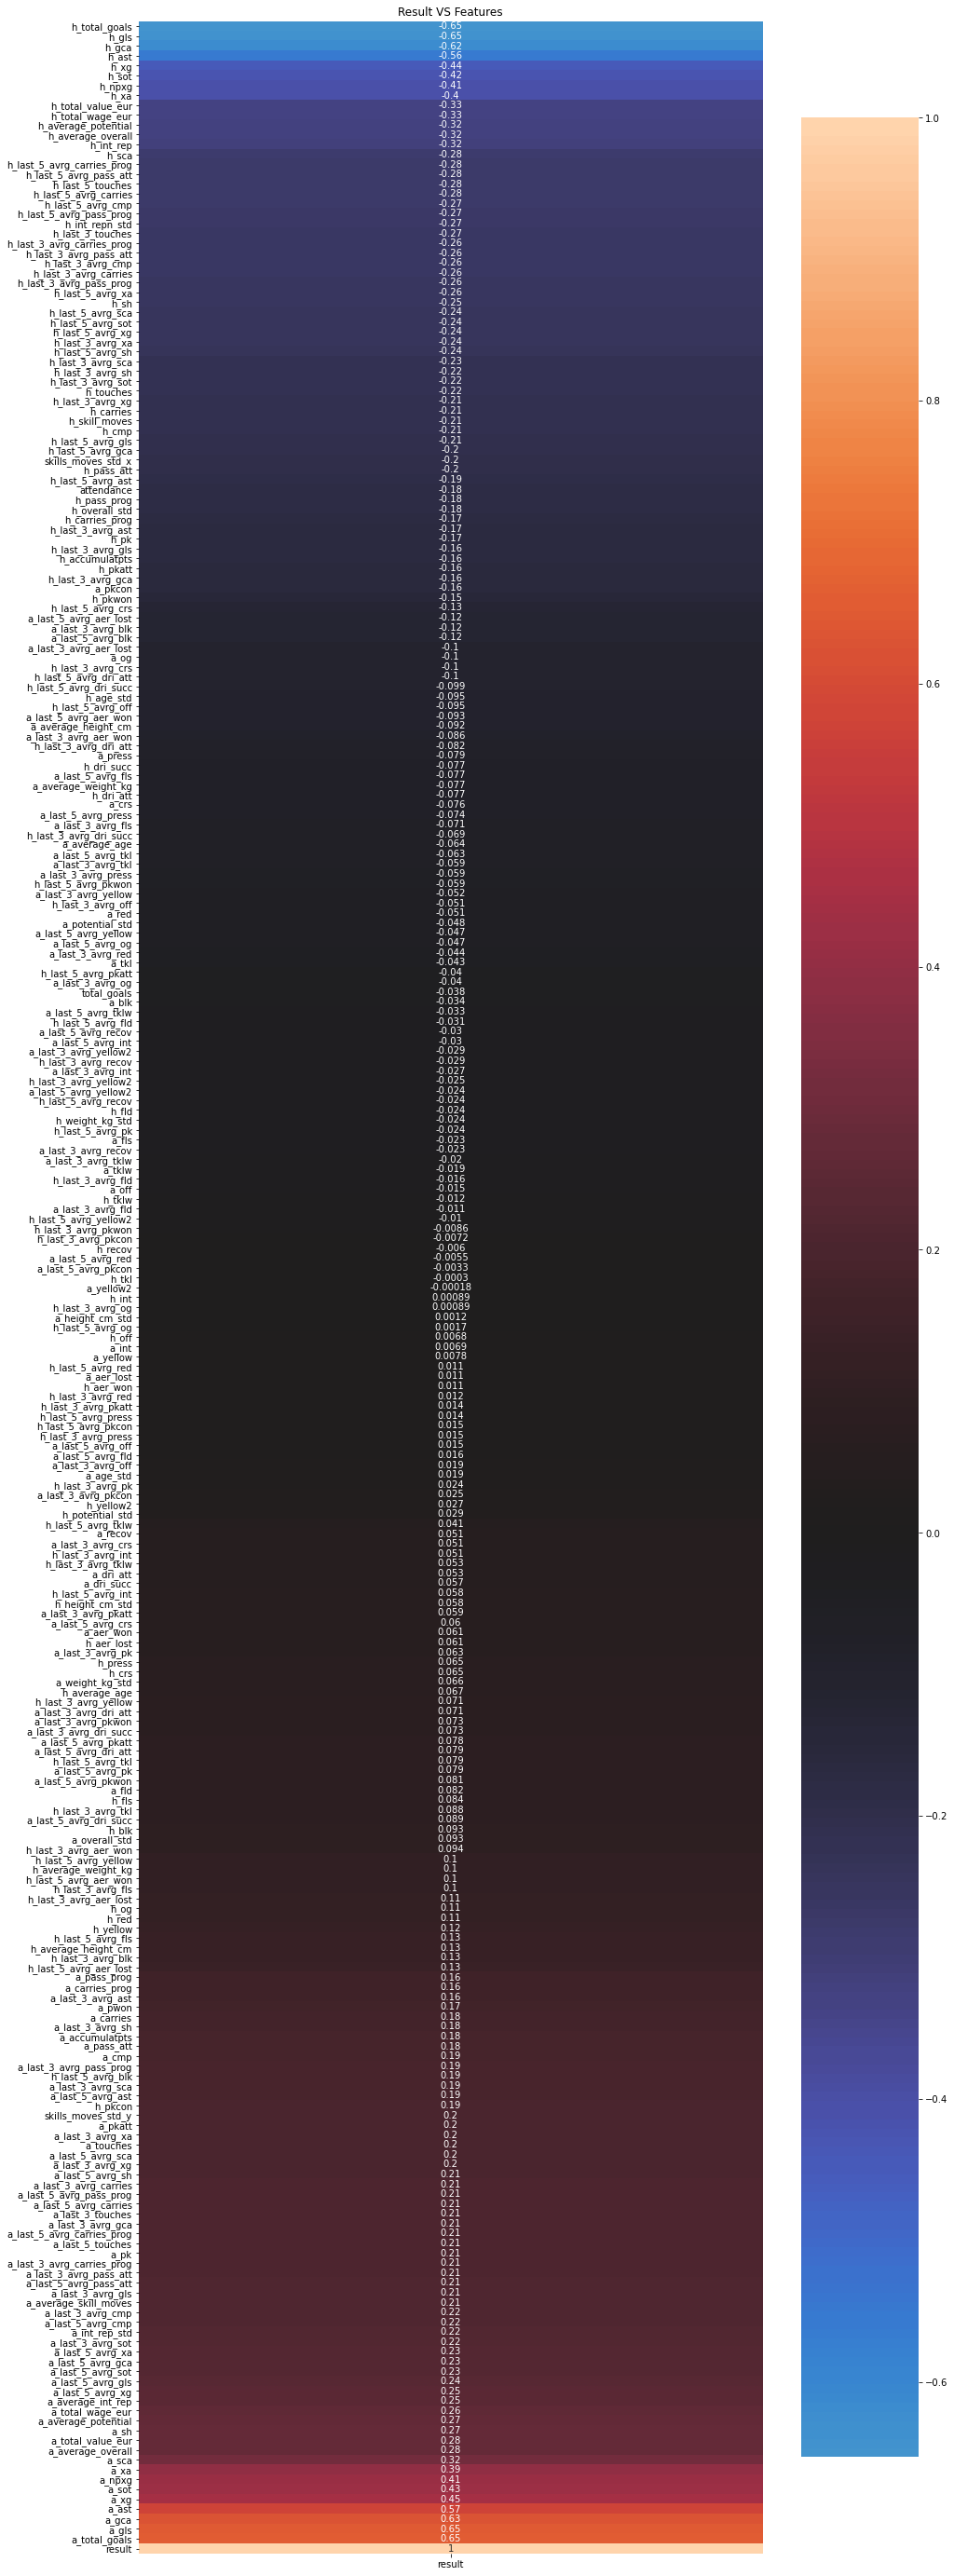

In [53]:
#Correlation between features and target feature, result
plt.figure(figsize=(15,50))
sns.heatmap(combined_test.corr()[['result']].sort_values('result'), annot=True,center =0)
plt.title('Result VS Features')

Based on the above heatmap for the combined datasets features, h_total_goals and h_gca are negatively correlated with the result, whereas a_gls and a_ast are very correlated. Apparently, some other features are not very correlated with the result. We might have to look into them.

In [54]:
test_corrs = combined_test.corrwith(combined_test['result'])
test_corrs_index = test_corrs[(test_corrs < 0.1) & (test_corrs > -0.1)]

In [55]:
pd.DataFrame(test_corrs_index).sort_values(by=0,ascending=True).T

h_last_5_avrg_dri_succ  h_age_std  h_last_5_avrg_off  \
0               -0.098692  -0.094817          -0.094579   

   a_last_5_avrg_aer_won  a_average_height_cm  a_last_3_avrg_aer_won  \
0              -0.093299            -0.092154              -0.085565   

   h_last_3_avrg_dri_att  a_press  h_dri_succ  a_last_5_avrg_fls  \
0              -0.081606 -0.07911   -0.077494          -0.077448   

   a_average_weight_kg  h_dri_att     a_crs  a_last_5_avrg_press  \
0            -0.077182  -0.076906 -0.076089            -0.073697   

   a_last_3_avrg_fls  h_last_3_avrg_dri_succ  a_average_age  \
0          -0.070525               -0.068992      -0.063658   

   a_last_5_avrg_tkl  a_last_3_avrg_tkl  a_last_3_avrg_press  \
0          -0.063297          -0.059379             -0.05886   

   h_last_5_avrg_pkwon  a_last_3_avrg_yellow  h_last_3_avrg_off     a_red  \
0            -0.058524             -0.052235          -0.051449 -0.050794   

   a_potential_std  a_last_5_avrg_yellow  a_last_5_avrg_og  a_last_3_avrg_red  \
0         -0.04777              -0.04679         -0.046775          -0.043659   

      a_tkl  h_last_5_avrg_pkatt  a_last_3_avrg_og  total_goals     a_blk  \
0 -0.042783            -0.039683         -0.039648    -0.038061 -0.034139   

   a_last_5_avrg_tklw  h_last_5_avrg_fld  a_last_5_avrg_recov  \
0           -0.032677          -0.030771            -0.029705   

   a_last_5_avrg_int  a_last_3_avrg_yellow2  h_last_3_avrg_recov  \
0          -0.029697              -0.028667            -0.028517   

   a_last_3_avrg_int  h_last_3_avrg_yellow2  a_last_5_avrg_yellow2  \
0          -0.026984              -0.025267              -0.024358   

   h_last_5_avrg_recov     h_fld  h_weight_kg_std  h_last_5_avrg_pk    a_fls  \
0            -0.024278 -0.024219        -0.023957         -0.023797 -0.02344   

   a_last_3_avrg_recov  a_last_3_avrg_tklw   a_tklw  h_last_3_avrg_fld  \
0            -0.022746           -0.020066 -0.01905          -0.015747   

      a_off    h_tklw  a_last_3_avrg_fld  h_last_5_avrg_yellow2  \
0 -0.015483 -0.011988          -0.011111               -0.01011   

   h_last_3_avrg_pkwon  h_last_3_avrg_pkcon   h_recov  a_last_5_avrg_red  \
0            -0.008572            -0.007172 -0.006011          -0.005486   

   a_last_5_avrg_pkcon     h_tkl  a_yellow2     h_int  h_last_3_avrg_og  \
0             -0.00331 -0.000295  -0.000181  0.000886          0.000892   

   a_height_cm_std  h_last_5_avrg_og     h_off     a_int  a_yellow  \
0         0.001215          0.001686  0.006767  0.006853  0.007796   

   h_last_5_avrg_red  h_aer_won  a_aer_lost  h_last_3_avrg_red  \
0           0.011106   0.011244    0.011244            0.01204   

   h_last_3_avrg_pkatt  h_last_5_avrg_press  h_last_5_avrg_pkcon  \
0             0.013602             0.014246               0.0148   

   h_last_3_avrg_press  a_last_5_avrg_off  a_last_5_avrg_fld  \
0             0.014862           0.015308           0.016436   

   a_last_3_avrg_off  a_age_std  h_last_3_avrg_pk  a_last_3_avrg_pkcon  \
0           0.018792   0.019043          0.024005             0.025388   

   h_yellow2  h_potential_std  h_last_5_avrg_tklw   a_recov  \
0   0.027292         0.028804            0.041145  0.050773   

   a_last_3_avrg_crs  h_last_3_avrg_int  h_last_3_avrg_tklw  a_dri_att  \
0           0.050851           0.051404            0.052662   0.052976   

   a_dri_succ  h_last_5_avrg_int  h_height_cm_std  a_last_3_avrg_pkatt  \
0    0.056814           0.057998          0.05812             0.059203   

   a_last_5_avrg_crs  a_aer_won  h_aer_lost  a_last_3_avrg_pk   h_press  \
0           0.060284    0.06127     0.06127          0.063231  0.064759   

      h_crs  a_weight_kg_std  h_average_age  h_last_3_avrg_yellow  \
0  0.065129         0.065865       0.067227              0.070742   

   a_last_3_avrg_dri_att  a_last_3_avrg_pkwon  a_last_3_avrg_dri_succ  \
0               0.071329             0.072762                0.072822   

   a_last_5_avrg_pkatt  a_l

There are 126 features that have very low correlation with result. Low correlation means between 0.1 to -0.1. Some features include height and weight for both teams. There are also match stats features such as fouls drawn, fouls, ball recovery, interceptions and yellow card. Other features are features that were feature engineered or past average performance of the team. We might be looking to drop features that have low correlation.

### Comparing Results and Total Goals

Here we look compare the relationship of total goals and result.

Text(0.5, 1.0, 'Comparison between Total Goals and Result')

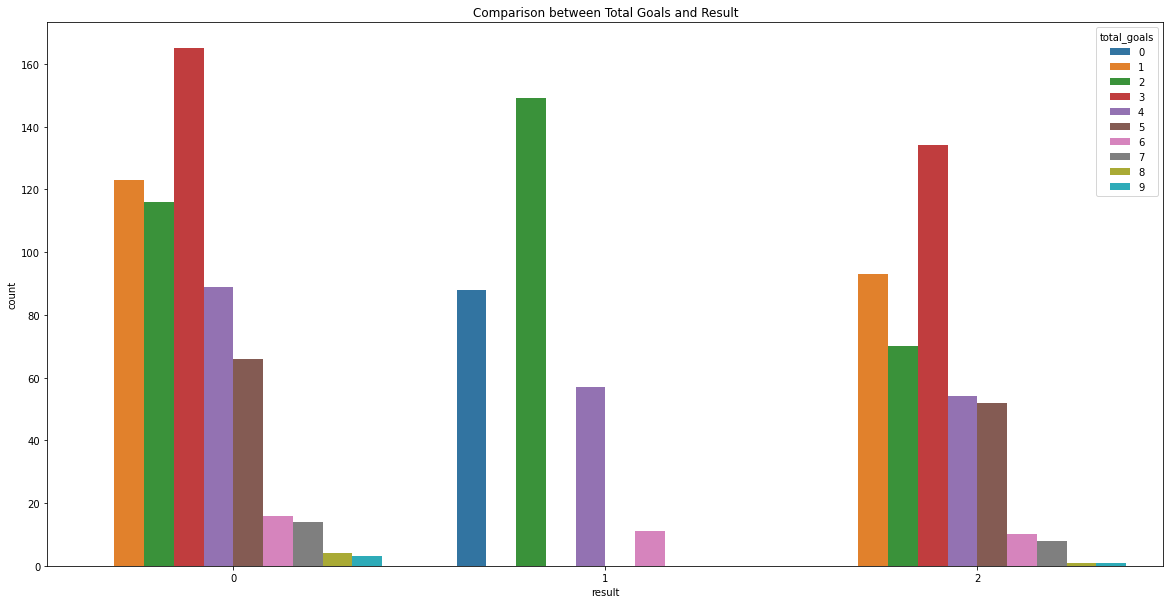

In [56]:
#Comparing total goals and results
plt.figure(figsize= (20,10))
sns.countplot(data = combined_test, x = 'result',hue='total_goals')
plt.title('Comparison between Total Goals and Result')

It seems that most of the home wins have 3 total goals. For the drawn games, numbers are always even and the most occurrence of total goals is 2. Most of the away wins end up with 3 total goal as well. From the bar chart above, we can see that most of the matches ended with 3 goals. 

### Goals Build Up Features 

In the below scatter plots, we are comparing the goals build up features, such as shots, shots on targets, assist and goals. We will study both the away and home side stats.

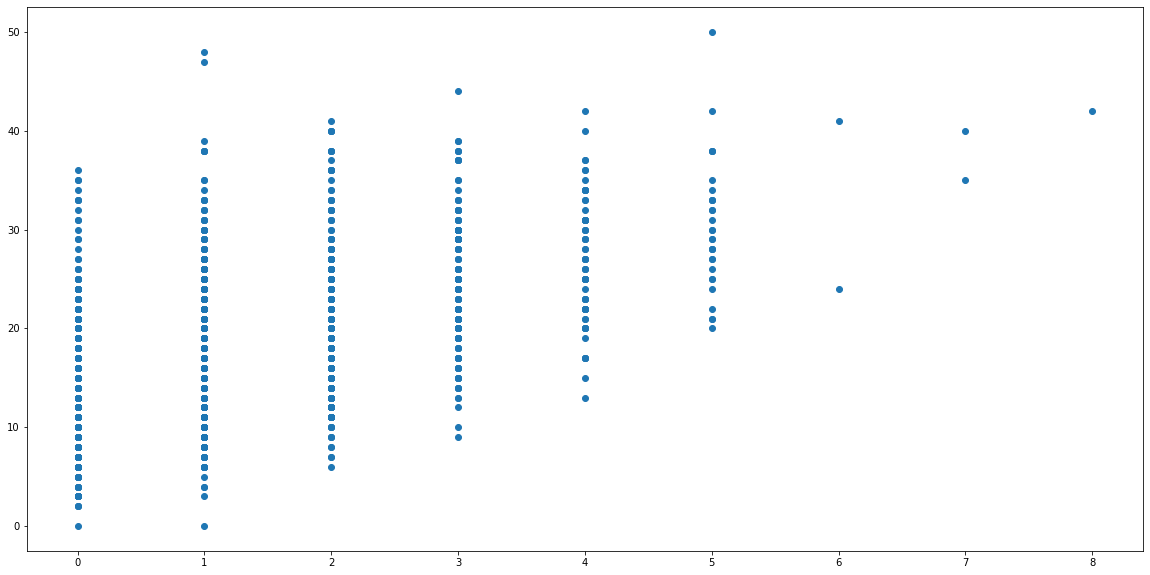

In [57]:
plt.figure(figsize=(20,10))
plt.scatter(combined_test['h_gls'],combined_test['h_sh']+combined_test['h_ast']+combined_test['h_sot'])

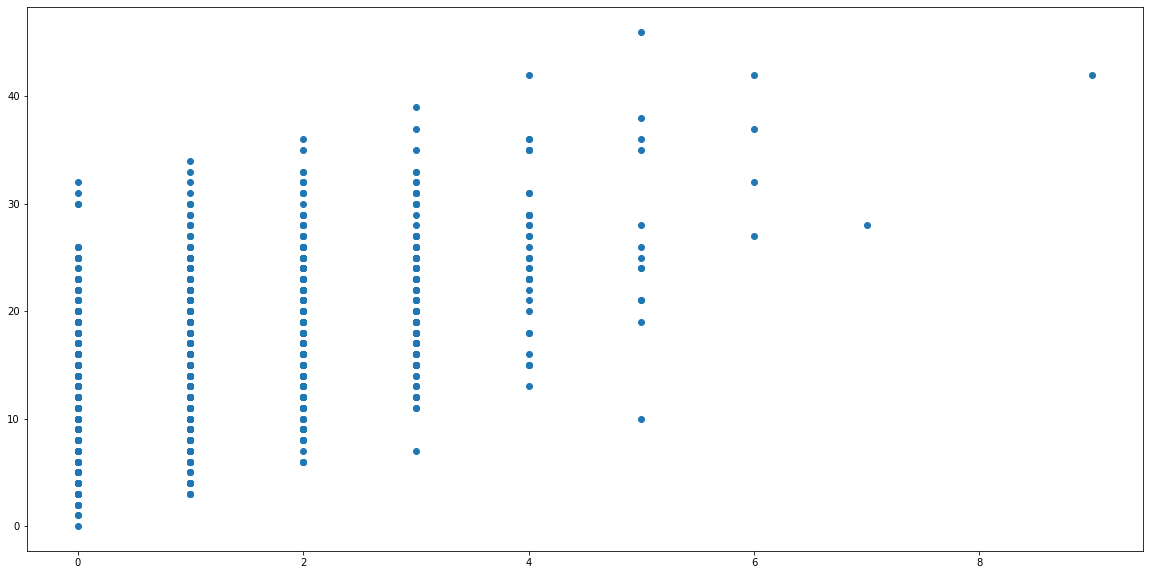

In [58]:
plt.figure(figsize=(20,10))
plt.scatter(combined_test['a_gls'],combined_test['a_sh']+combined_test['a_ast']+combined_test['a_sot'])

Basesd on the scatter plot above, we can see that there are a positive linear relationship between the goals build up features. I think it is due to that the shots, shots on target and assist, are positively correlated with the goals.

### Home Total Goals and Past Matches Goals Features

As we will be also predicting home total goals for future matches, we will like to see the correlation between the past matches goals and total goals. Other features such as gls, xg, shots and shots will also be compared in the pair grids.

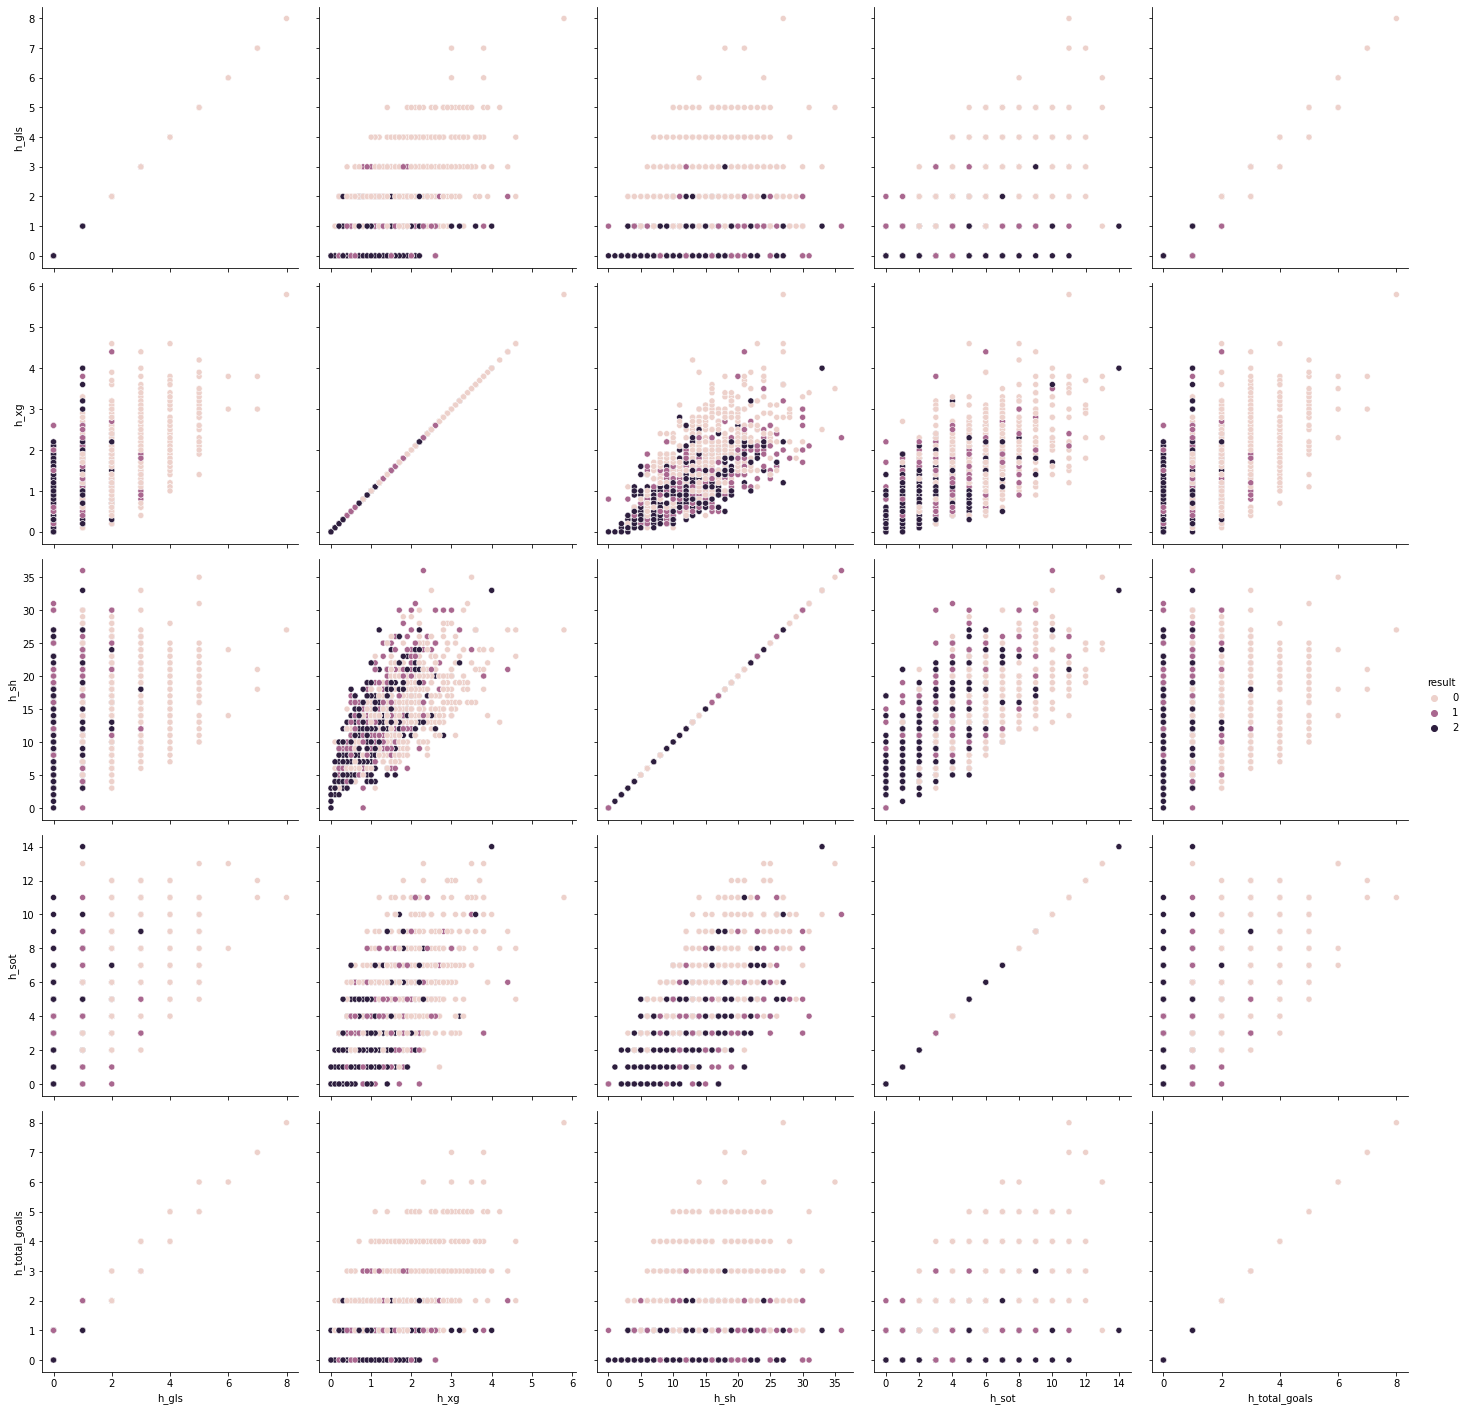

In [59]:
plot = sns.PairGrid(combined_test,vars = ['h_gls','h_xg','h_sh','h_sot','h_total_goals'],hue='result',height=4)
plot.map(sns.scatterplot)
plot.add_legend()

Based on the pair grid above, there is a linear positive strong relationship between home total goals and other features such as shots, shots on target, goals and expected goals.

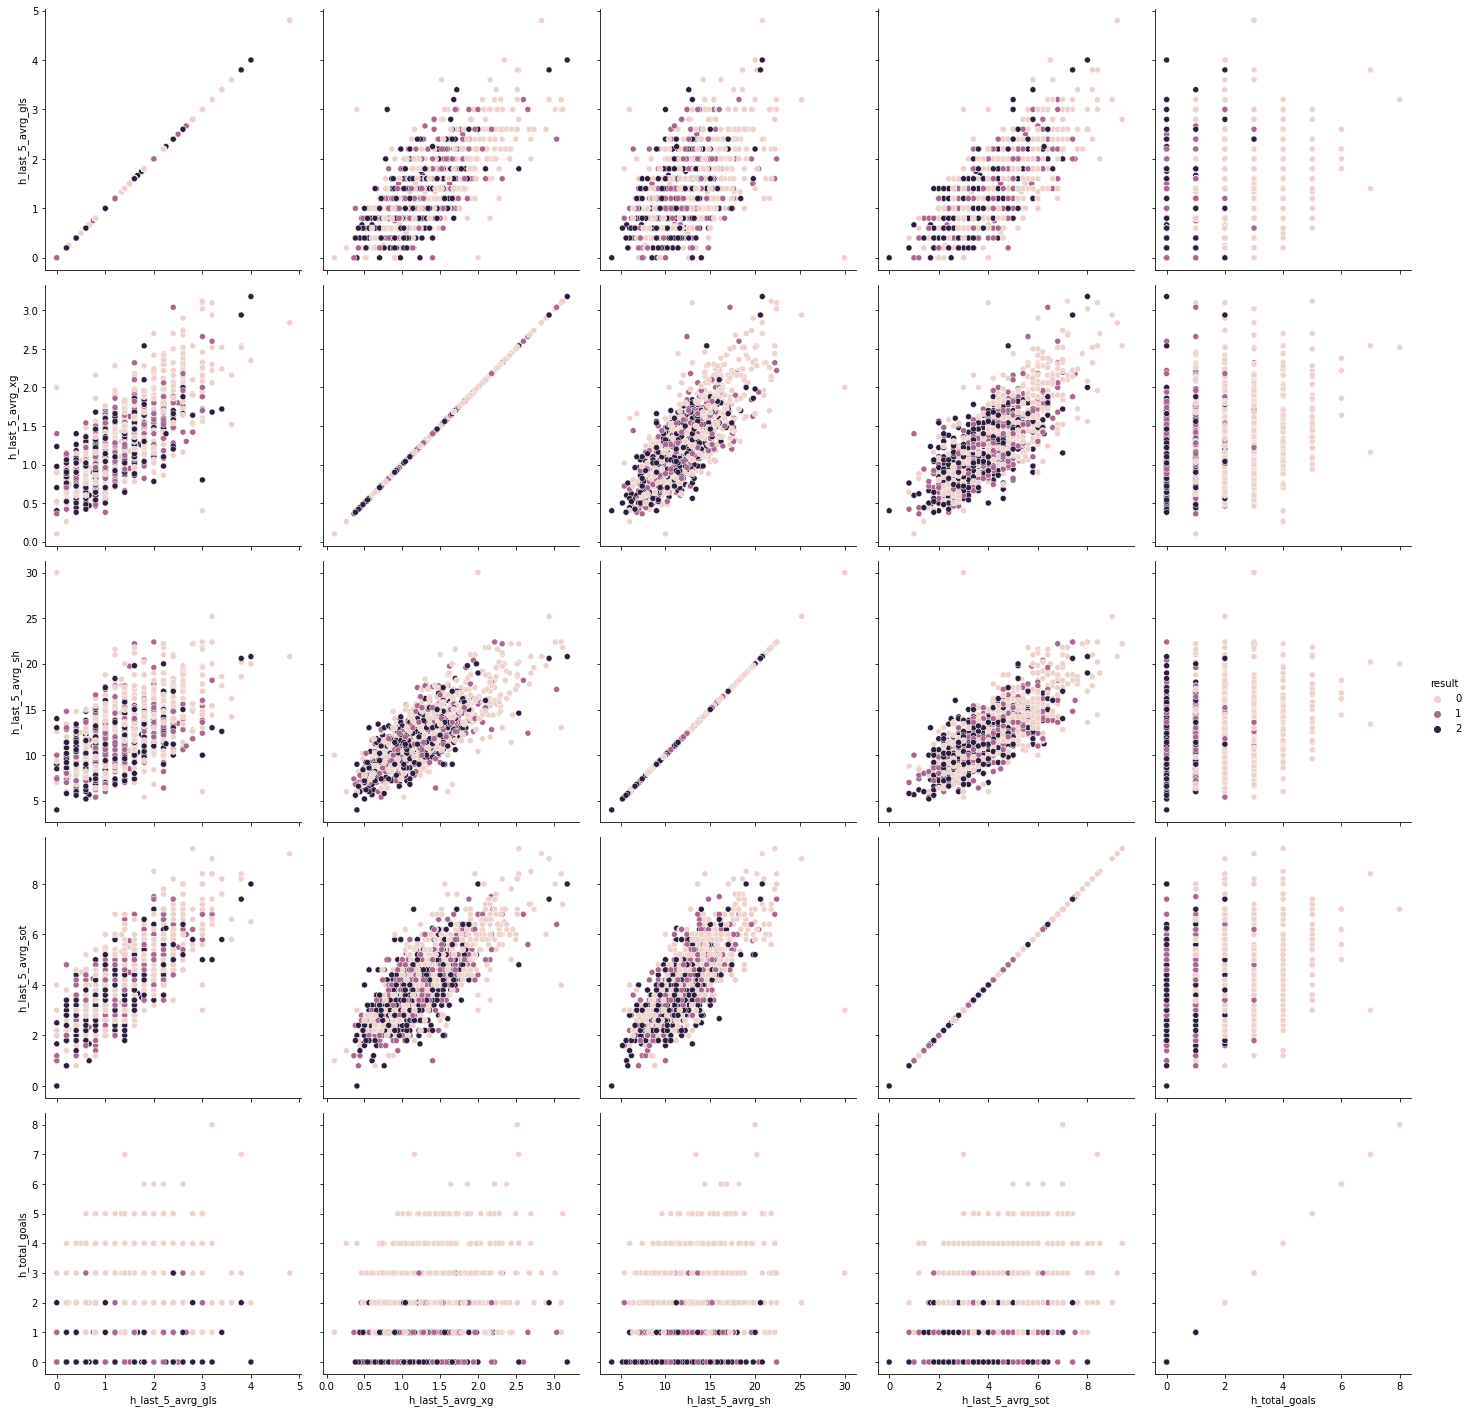

In [60]:
plot = sns.PairGrid(combined_test,vars = ['h_last_5_avrg_gls','h_last_5_avrg_xg','h_last_5_avrg_sh','h_last_5_avrg_sot','h_total_goals'],hue='result',height=4)
plot.map(sns.scatterplot)
plot.add_legend()

Using past matches features, there are not very strong relationship and abit linear between them and total goals. These features might be able to determine future goals.

### Away Total Goals and Past Matches Goals Features

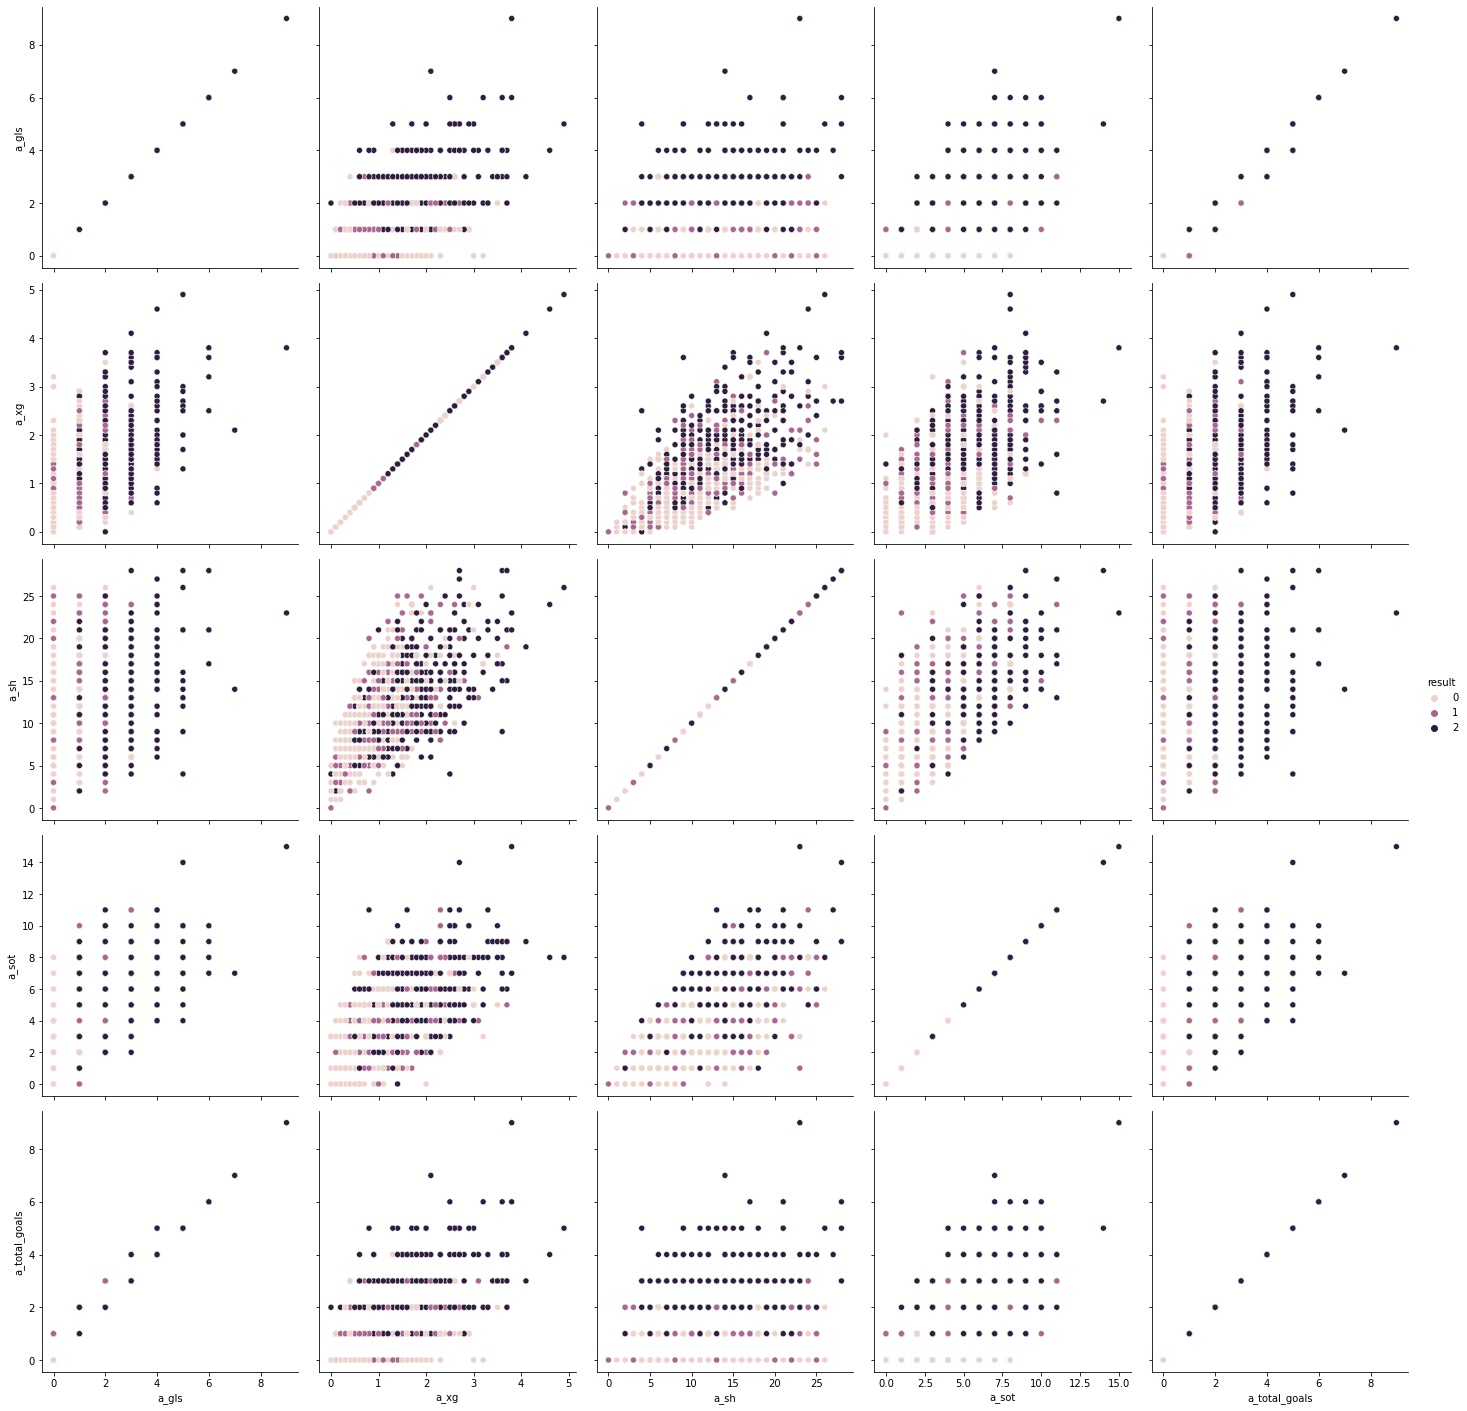

In [61]:
plot = sns.PairGrid(combined_test,vars = ['a_gls','a_xg','a_sh','a_sot','a_total_goals'],hue='result',height=4)
plot.map(sns.scatterplot)
plot.add_legend()

Same as the home total goals, based on the pair grid above, there is a linear positive obvious relationship between away total goals and other features such as shots, shots on target, goals and expected goals. 

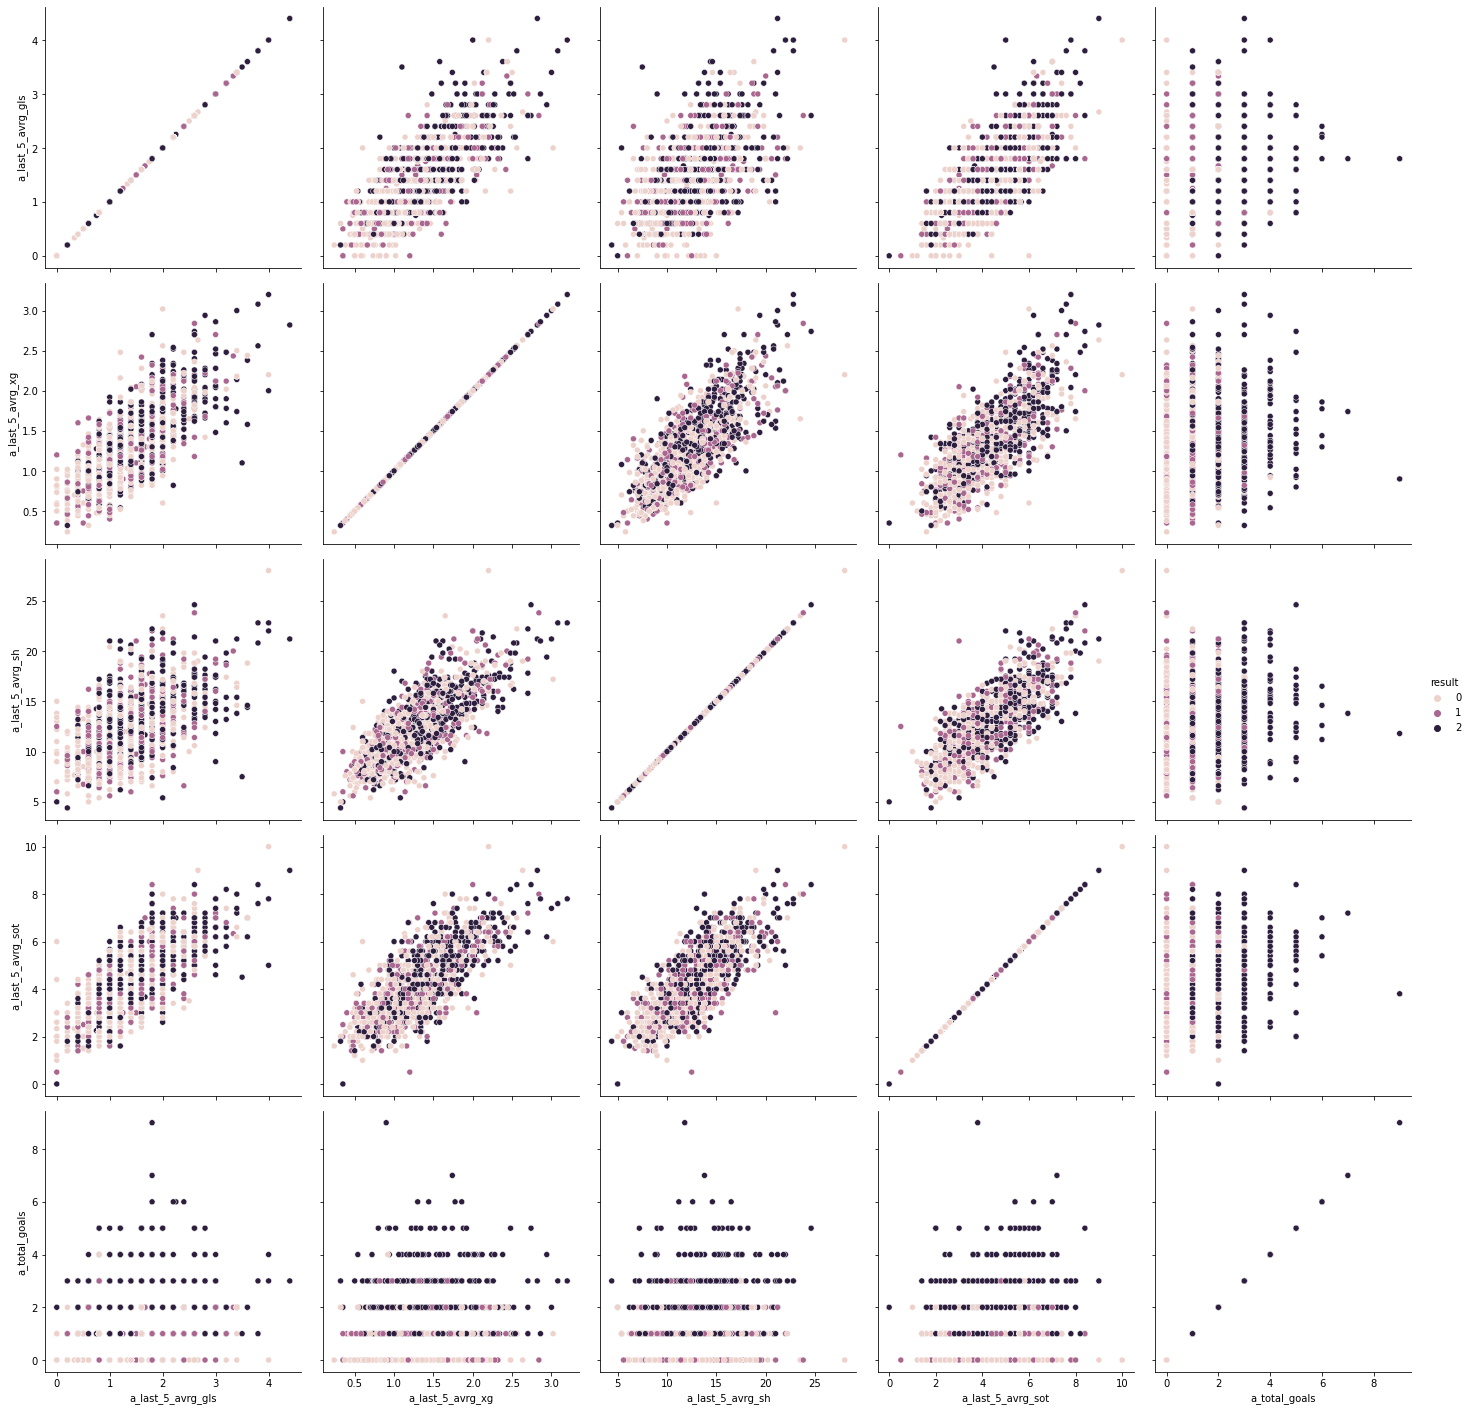

In [62]:
plot = sns.PairGrid(combined_test,vars = ['a_last_5_avrg_gls','a_last_5_avrg_xg','a_last_5_avrg_sh','a_last_5_avrg_sot','a_total_goals'],hue='result',height=4)
plot.map(sns.scatterplot)
plot.add_legend()

Similar to the home goals, there are moderate relationship and abit linear between them and total goals. These features might be able to determine future goals.

In [63]:
combined_test.head()

date                                      match  \
0 2017-08-11                  Arsenal_vs_Leicester_City   
1 2017-08-12        Crystal_Palace_vs_Huddersfield_Town   
2 2017-08-12                         Chelsea_vs_Burnley   
3 2017-08-12  Brighton_&_Hove_Albion_vs_Manchester_City   
4 2017-08-12        West_Bromwich_Albion_vs_Bournemouth   

                     home                                            stadium  \
0                 Arsenal                           Emirates Stadium, London   
1          Crystal Palace                              Selhurst Park, London   
2                 Chelsea                            Stamford Bridge, London   
3  Brighton & Hove Albion  The American Express Community Stadium, Bright...   
4    West Bromwich Albion                       The Hawthorns, West Bromwich   

   attendance  h_gls  h_ast  h_pk  h_pkatt  h_sh  h_sot  h_yellow  h_red  \
0       59387      4      4     0        0    28     10         0      0   
1       25448      0      0     0        0    13      3         1      0   
2       41616      2      2     0        0    18      6         4      2   
3       30415      0      0     0        0     7      2         0      0   
4       25011      1      1     0        0    17      6         3      0   

   h_touches  h_press  h_tkl  h_int  h_blk  h_xg  h_npxg  h_xa  h_sca  h_gca  \
0      782.0    162.0   20.0      9   11.0   2.2     2.2   2.2   51.0    7.0   
1      563.0     98.0   18.0      9   17.0   0.9     0.9   0.3   12.0    0.0   
2      647.0    114.0    8.0      2   11.0   1.0     1.0   0.8   28.0    4.0   
3      338.0    217.0    7.0      9   22.0   0.5     0.5   0.2    9.0    0.0   
4      399.0    136.0   15.0      9   17.0   1.1     1.1   0.9   25.0    2.0   

   h_cmp  h_pass_att  h_pass_prog  h_carries  h_carries_prog  h_dri_succ  \
0  546.0       659.0         50.0      593.0            90.0        15.0   
1  326.0       445.0         39.0      350.0            33.0        13.0   
2  455.0       561.0         37.0      424.0            72.0         9.0   
3  138.0       241.0         10.0      150.0            10.0         7.0   
4  188.0       294.0         14.0      218.0            21.0         3.0   

   h_dri_att  h_yellow2  h_fls  h_fld  h_off  h_crs  h_tklw  h_pkwon  h_pkcon  \
0       20.0          0      9     13      5     15      13      0.0      0.0   
1       23.0          0      8     20      0     10       9      0.0      0.0   
2       12.0          1     15     14      3     18       6      0.0      0.0   
3       11.0          0      8      7      6      4       5      0.0      0.0   
4        9.0          0     21      2      2     13      12      0.0      0.0   

   h_og  h_recov  h_aer_won  h_aer_lost  h_last_5_avrg_gls  h_last_5_avrg_ast  \
0     0    113.0       11.0         7.0                NaN                NaN   
1     1    116.0       13.0         7.0                NaN                NaN   
2     0    110.0        8.0        14.0                NaN                NaN   
3     1     78.0        6.0         5.0                NaN                NaN   
4     0     94.0        9.0        10.0                NaN                NaN   

   h_last_5_avrg_pk  h_last_5_avrg_pkatt  h_last_5_avrg_sh  h_last_5_avrg_sot  \
0               NaN                  NaN               NaN                NaN   
1               NaN                  NaN               NaN                NaN   
2               NaN                  NaN               NaN                NaN   
3               NaN                  NaN               NaN                NaN   
4               NaN                  NaN               NaN                NaN   

   h_last_5_avrg_yellow  h_last_5_avrg_red  h_last_5_touches  \
0                   NaN                NaN               NaN   
1                   NaN                NaN               NaN   
2                   NaN                NaN               NaN   
3                   NaN                NaN               NaN

### Additional Study : Past Three Season Champions - Liverpool VS Manchester City

For the past few years, Manchester City and Liverpool have been competing for the title very closely. Manchester City is the champion for season 2017-2018 and 2018-2019, whereas Liverpool is the champion for 2019-2020. Let's study their performance for the past seasons and the current seasons.

In [64]:
def head_to_head(x,y,df):
    df1 = df.loc[(df['home'] == x) & (df['away'] == y)]
    df2 = df.loc[(df['home'] == y) & (df['away'] == x)]
    df1 = df1.append(df2).sort_values('date',ascending=False)
    return df1

In [65]:
liv_manc = head_to_head('Liverpool','Manchester City',combined_test)

In [66]:
liv_manc.head()

date                         match             home  \
74  2020-11-08  Manchester_City_vs_Liverpool  Manchester City   
318 2020-07-02  Manchester_City_vs_Liverpool  Manchester City   
118 2019-11-10  Liverpool_vs_Manchester_City        Liverpool   
209 2019-01-03  Manchester_City_vs_Liverpool  Manchester City   
79  2018-10-07  Liverpool_vs_Manchester_City        Liverpool   

                        stadium  attendance  h_gls  h_ast  h_pk  h_pkatt  \
74    Etihad Stadium Manchester           0      1      1     0        1   
318   Etihad Stadium Manchester           0      3      2     1        1   
118          Anfield, Liverpool       53324      3      2     0        0   
209  Etihad Stadium, Manchester       54511      2      2     0        0   
79           Anfield, Liverpool       52117      0      0     0        0   

     h_sh  h_sot  h_yellow  h_red  h_touches  h_press  h_tkl  h_int  h_blk  \
74      6      2         3      0      675.0    115.0   12.0      7   13.0   
318    13      4         2      0      633.0    140.0   12.0      4   13.0   
118    12      5         0      0      568.0    279.0   15.0      5   25.0   
209     9      4         4      0      728.0    274.0   15.0     11   11.0   
79      7      2         1      0      656.0    170.0   17.0     15   12.0   

     h_xg  h_npxg  h_xa  h_sca  h_gca  h_cmp  h_pass_att  h_pass_prog  \
74    1.6     0.8   0.8   12.0    2.0  496.0       582.0         33.0   
318   2.7     1.9   1.9   24.0    6.0  445.0       527.0         29.0   
118   0.9     0.9   0.9   16.0    4.0  350.0       457.0         24.0   
209   0.9     0.9   0.5    9.0    3.0  499.0       616.0         30.0   
79    0.5     0.5   0.4   11.0    0.0  448.0       549.0         36.0   

     h_carries  h_carries_prog  h_dri_succ  h_dri_att  h_yellow2  h_fls  \
74       509.0            42.0         6.0       15.0          0     21   
318      447.0            45.0        13.0       21.0          0     10   
118      378.0            26.0        15.0       24.0          0     14   
209      540.0            47.0        11.0       19.0          0     13   
79       456.0            29.0         8.0       16.0          0     11   

     h_fld  h_off  h_crs  h_tklw  h_pkwon  h_pkcon  h_og  h_recov  h_aer_won  \
74      10      2     10       6      0.0      1.0     0     74.0        8.0   
318      8      3      7      10      1.0      0.0     0     77.0        7.0   
118      4      3     10      10      0.0      0.0     0     94.0       13.0   
209      8      2     10      12      0.0      0.0     0    106.0       15.0   
79      12      2     12      12      0.0      1.0     0    101.0        4.0   

     h_aer_lost  h_last_5_avrg_gls  h_last_5_avrg_ast  h_last_5_avrg_pk  \
74          4.0                1.2                0.8               0.0   
318         9.0                2.0                1.0               0.4   
118        17.0                1.6                0.8               0.4   
209         5.0                1.6                1.6               0.0   
79          5.0                1.6                1.0               0.0   

     h_last_5_avrg_pkatt  h_last_5_avrg_sh  h_last_5_avrg_sot  \
74                   0.0              16.4                5.2   
318                  0.6              14.2                5.8   
118                  0.4              17.6                6.6   
209                  0.0              14.4                4.8   
79                   0.0              15.4                5.6   

     h_last_5_avrg_yellow  h_last_5_avrg_red  h_last_5_touches  \
74                    1.2                0.0             775.2   
318                   1.4                0.2             844.6   
118                   1.6                0.0             790.2   
209                   1.2                0.2             846.8   
79                    1.0                0.0             730.2   

     h_last_5_avrg_press  h_last_5_avrg_tkl  h_last_5_avrg_int  \
74               

In [67]:
liv_manc[['date','match','home','away','result']]

date                         match             home  \
74  2020-11-08  Manchester_City_vs_Liverpool  Manchester City   
318 2020-07-02  Manchester_City_vs_Liverpool  Manchester City   
118 2019-11-10  Liverpool_vs_Manchester_City        Liverpool   
209 2019-01-03  Manchester_City_vs_Liverpool  Manchester City   
79  2018-10-07  Liverpool_vs_Manchester_City        Liverpool   
227 2018-01-14  Liverpool_vs_Manchester_City        Liverpool   
35  2017-09-09  Manchester_City_vs_Liverpool  Manchester City   

                away  result  
74         Liverpool       1  
318        Liverpool       0  
118  Manchester City       0  
209        Liverpool       0  
79   Manchester City       1  
227  Manchester City       0  
35         Liverpool       0

Text(0.5, 1.0, 'Head-to-Head Liverpool & Manchester City')

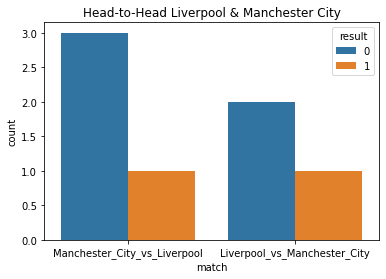

In [68]:
sns.countplot(data = liv_manc,x='match',hue='result')
plt.title('Head-to-Head Liverpool & Manchester City')

Based on our data for last three seasons and the current, Liverpool and Manchester City have faced each other for seven times. None of them have won at away games. Manchester City won the most when at their respective home games.

In [69]:
liv_manc[['date','home','h_average_overall','a_average_overall']]

date             home  h_average_overall  a_average_overall
74  2020-11-08  Manchester City              84.18              83.50
318 2020-07-02  Manchester City              84.50              83.28
118 2019-11-10        Liverpool              83.28              84.50
209 2019-01-03  Manchester City              84.00              82.33
79  2018-10-07        Liverpool              82.33              84.00
227 2018-01-14        Liverpool              78.89              83.06
35  2017-09-09  Manchester City              83.06              78.89

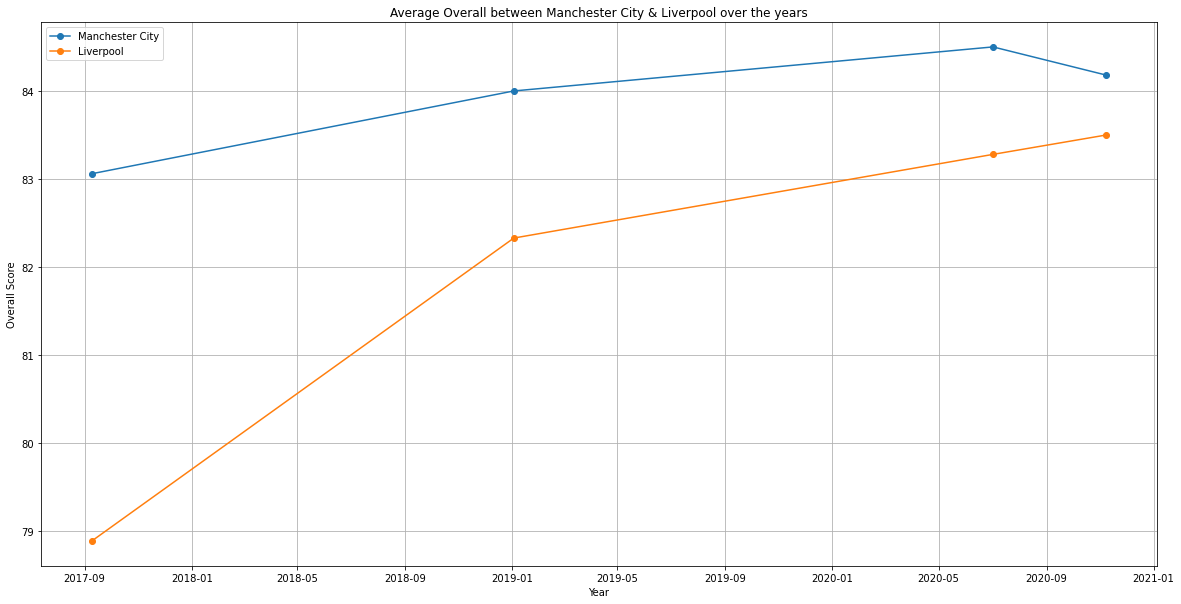

In [70]:
date = list(liv_manc.loc[liv_manc['home'] == 'Manchester City']['date'])
hova = list(liv_manc.loc[liv_manc['home'] == 'Manchester City']['h_average_overall'])
aova = list(liv_manc.loc[liv_manc['home'] == 'Manchester City']['a_average_overall'])

plt.figure(figsize=(20,10))
plt.plot(date,hova,marker='o')
plt.plot(date,aova,marker='o')
plt.title('Average Overall between Manchester City & Liverpool over the years')
plt.xlabel('Year')
plt.ylabel('Overall Score')
plt.grid(True)
plt.legend(('Manchester City','Liverpool'))

Over the years, Manchester City have a higher overall score than Liverpool. However, Liverpool's overall score is increasing. Manchester City's overall score decrease in mid 2020. This might explains why Liverpool won the championship in that season.

### Season 2019/2020 Study

In this section, we will study one of the season exclusively. We picked 2019/2020 season is because it is the latest completed season. 

In [71]:
season_1920 = combined_test.loc[(combined_test['date'] > '2019-08-08') & (combined_test['date'] < '2020-07-27')]

In [72]:
season_1920.head()

date                               match               home  \
0 2019-08-09           Liverpool_vs_Norwich_City          Liverpool   
1 2019-08-10     Bournemouth_vs_Sheffield_United        Bournemouth   
2 2019-08-10  West_Ham_United_vs_Manchester_City    West Ham United   
3 2019-08-10    Tottenham_Hotspur_vs_Aston_Villa  Tottenham Hotspur   
4 2019-08-10              Burnley_vs_Southampton            Burnley   

                             stadium  attendance  h_gls  h_ast  h_pk  h_pkatt  \
0                 Anfield, Liverpool       53333      3      3     0        0   
1      Vitality Stadium, Bournemouth       10714      1      0     0        0   
2             London Stadium, London       59870      0      0     0        0   
3  Tottenham Hotspur Stadium, London       60407      3      2     0        0   
4                 Turf Moor, Burnley       19784      3      2     0        0   

   h_sh  h_sot  h_yellow  h_red  h_touches  h_press  h_tkl  h_int  h_blk  \
0    15      7         0      0      633.0    158.0   24.0     11   15.0   
1    13      3         2      0      628.0    165.0   16.0      4   10.0   
2     5      3         2      0      531.0    233.0   18.0      4   15.0   
3    30      7         1      0      742.0    145.0   15.0      3    6.0   
4     9      4         0      0      500.0    143.0   22.0      9   16.0   

   h_xg  h_npxg  h_xa  h_sca  h_gca  h_cmp  h_pass_att  h_pass_prog  \
0   1.9     1.9   1.5   23.0    7.0  409.0       521.0         51.0   
1   1.1     1.1   0.1   15.0    1.0  409.0       529.0         30.0   
2   0.9     0.9   0.7    9.0    0.0  347.0       428.0         16.0   
3   2.2     2.2   1.4   47.0    4.0  552.0       639.0         56.0   
4   0.6     0.6   0.4   12.0    5.0  214.0       346.0         13.0   

   h_carries  h_carries_prog  h_dri_succ  h_dri_att  h_yellow2  h_fls  h_fld  \
0      434.0            50.0        10.0       14.0          0     10     12   
1      436.0            44.0         7.0       14.0          0     10     19   
2      372.0            19.0         8.0       20.0          0     11     15   
3      607.0           104.0        13.0       25.0          0     14     11   
4      246.0            12.0        17.0       23.0          0      6     13   

   h_off  h_crs  h_tklw  h_pkwon  h_pkcon  h_og  h_recov  h_aer_won  \
0      0     15      12      0.0      0.0     0    106.0       14.0   
1      1     12       8      0.0      0.0     0    109.0        7.0   
2      2     10      13      0.0      1.0     0     72.0       16.0   
3      1     21      12      0.0      0.0     0     93.0       11.0   
4      5      7      14      0.0      0.0     0    107.0       30.0   

   h_aer_lost  h_last_5_avrg_gls  h_last_5_avrg_ast  h_last_5_avrg_pk  \
0         4.0                2.8                2.4               0.2   
1        18.0                2.4                2.2               0.0   
2        16.0                2.2                1.0               0.2   
3        10.0                0.6                0.2               0.0   
4        25.0                1.0                0.6               0.0   

   h_last_5_avrg_pkatt  h_last_5_avrg_sh  h_last_5_avrg_sot  \
0                  0.2              15.0                5.6   
1                  0.0              14.8                6.2   
2                  0.2              15.0                5.6   
3                  0.0              15.0                4.2   
4                  0.0               7.8                2.8   

   h_last_5_avrg_yellow  h_last_5_avrg_red  h_last_5_touches  \
0                   0.4                0.0             811.8   
1                   1.4                0.0             627.8   
2                   1.2                0.0             617.8   
3                   1.6                0.4             679.2   
4                   2.2                0.0             459.2   

   h_last_5_avrg_press  h_last_5_avrg_tkl  h_last_5_avrg_int  \
0                148.2             

#### Matches Attendance

In [73]:
season_1920[['date','match','attendance','stadium']].sort_values('attendance').tail(30)

date                                         match  attendance  \
120 2019-11-23                        Arsenal_vs_Southampton       60295   
267 2020-02-23                            Arsenal_vs_Everton       60296   
198 2019-12-29                            Arsenal_vs_Chelsea       60309   
220 2020-01-18                   Arsenal_vs_Sheffield_United       60310   
78  2019-10-06                        Arsenal_vs_Bournemouth       60326   
200 2020-01-01                  Arsenal_vs_Manchester_United       60328   
59  2019-09-22                        Arsenal_vs_Aston_Villa       60331   
39  2019-09-01                  Arsenal_vs_Tottenham_Hotspur       60333   
278 2020-03-07                    Arsenal_vs_West_Ham_United       60335   
96  2019-10-27                     Arsenal_vs_Crystal_Palace       60345   
104 2019-11-02            Arsenal_vs_Wolverhampton_Wanderers       60383   
3   2019-08-10              Tottenham_Hotspur_vs_Aston_Villa       60407   
248 2020-02-02          Tottenham_Hotspur_vs_Manchester_City       61022   
211 2020-01-11                Tottenham_Hotspur_vs_Liverpool       61023   
178 2019-12-22                  Tottenham_Hotspur_vs_Chelsea       61104   
167 2019-12-15                  Manchester_United_vs_Everton       63328   
236 2020-01-22                  Manchester_United_vs_Burnley       73198   
69  2019-09-30                  Manchester_United_vs_Arsenal       73201   
185 2019-12-26         Manchester_United_vs_Newcastle_United       73206   
142 2019-12-04        Manchester_United_vs_Tottenham_Hotspur       73252   
214 2020-01-11             Manchester_United_vs_Norwich_City       73271   
285 2020-03-08          Manchester_United_vs_Manchester_City       73288   
268 2020-02-23                  Manchester_United_vs_Watford       73347   
245 2020-02-01  Manchester_United_vs_Wolverhampton_Wanderers       73363   
139 2019-12-01              Manchester_United_vs_Aston_Villa       73381   
25  2019-08-24           Manchester_United_vs_Crystal_Palace       73454   
117 2019-11-10   Manchester_United_vs_Brighton_&_Hove_Albion       73556   
8   2019-08-11                  Manchester_United_vs_Chelsea       73620   
43  2019-09-14           Manchester_United_vs_Leicester_City       73689   
88  2019-10-20                Manchester_United_vs_Liverpool       73737   

                               stadium  
120           Emirates Stadium, London  
267           Emirates Stadium, London  
198           Emirates Stadium, London  
220           Emirates Stadium, London  
78            Emirates Stadium, London  
200           Emirates Stadium, London  
59            Emirates Stadium, London  
39            Emirates Stadium, London  
278           Emirates Stadium, London  
96            Emirates Stadium, London  
104           Emirates Stadium, London  
3    Tottenham Hotspur Stadium, London  
248  Tottenham Hotspur Stadium, London  
211  Tottenham Hotspur Stadium, London  
178  Tottenham Hotspur Stadium, London  
167           Old Trafford, Manchester  
236           Old Trafford, Manchester  
69            Old Trafford, Manchester  
185           Old Trafford, Manchester  
142           Old Trafford, Manchester  
214           Old Trafford, Manchester  
285           Old Trafford, Manchester  
268           Old Trafford, Manchester  
245           Old Trafford, Manchester  
139           Old Trafford, Manchester  
25            Old Trafford, Manchester  
117           Old Trafford, Manchester  
8             Old Trafford, Manchester  
43            Old Trafford, Manchester  
88            Old Trafford, Manchester

In this season, the match, Manchester United vs Liverpool which occurred on 2019-10-20 and played at Old Trafford, Manchester has the highest attendance. Manchester United and Liverpool are the few oldest and successful clubs in England. They have more than 100 silverwares between both of them. It seemed that Old Trafford have the most amount of attendance. 2nd place is Tottenham Hotspur Stadium, then in 3rd place is the Emirates Stadium. Both of them are located in North London.

Unfortunately due to Covid19, there are matches that have zero attendance. The matches are closed to spectators to avoid creating any virus cluster. Players will have to play in quiet stadiums. 

#### Team Overall and Result in Season 2019/2020

In [74]:
#Splitting into only home results & away results
home_result = season_1920[['home','result']].sort_values('result')
away_result = season_1920[['away','result']].sort_values('result')

Text(0.5, 1.0, 'Comparison between Away Team Overall and Result')

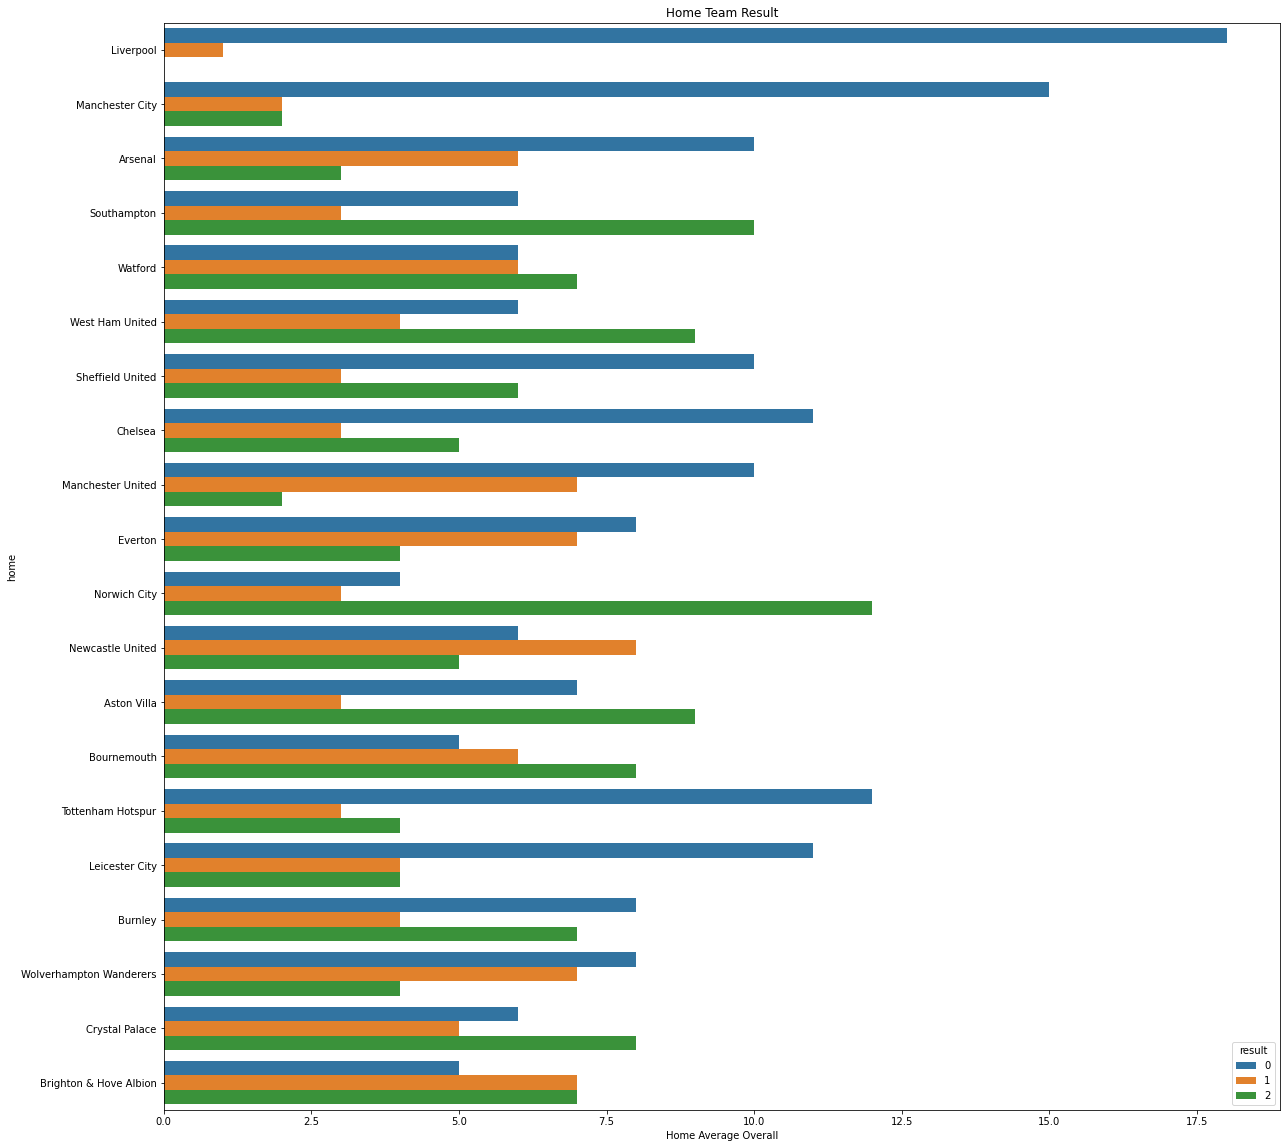

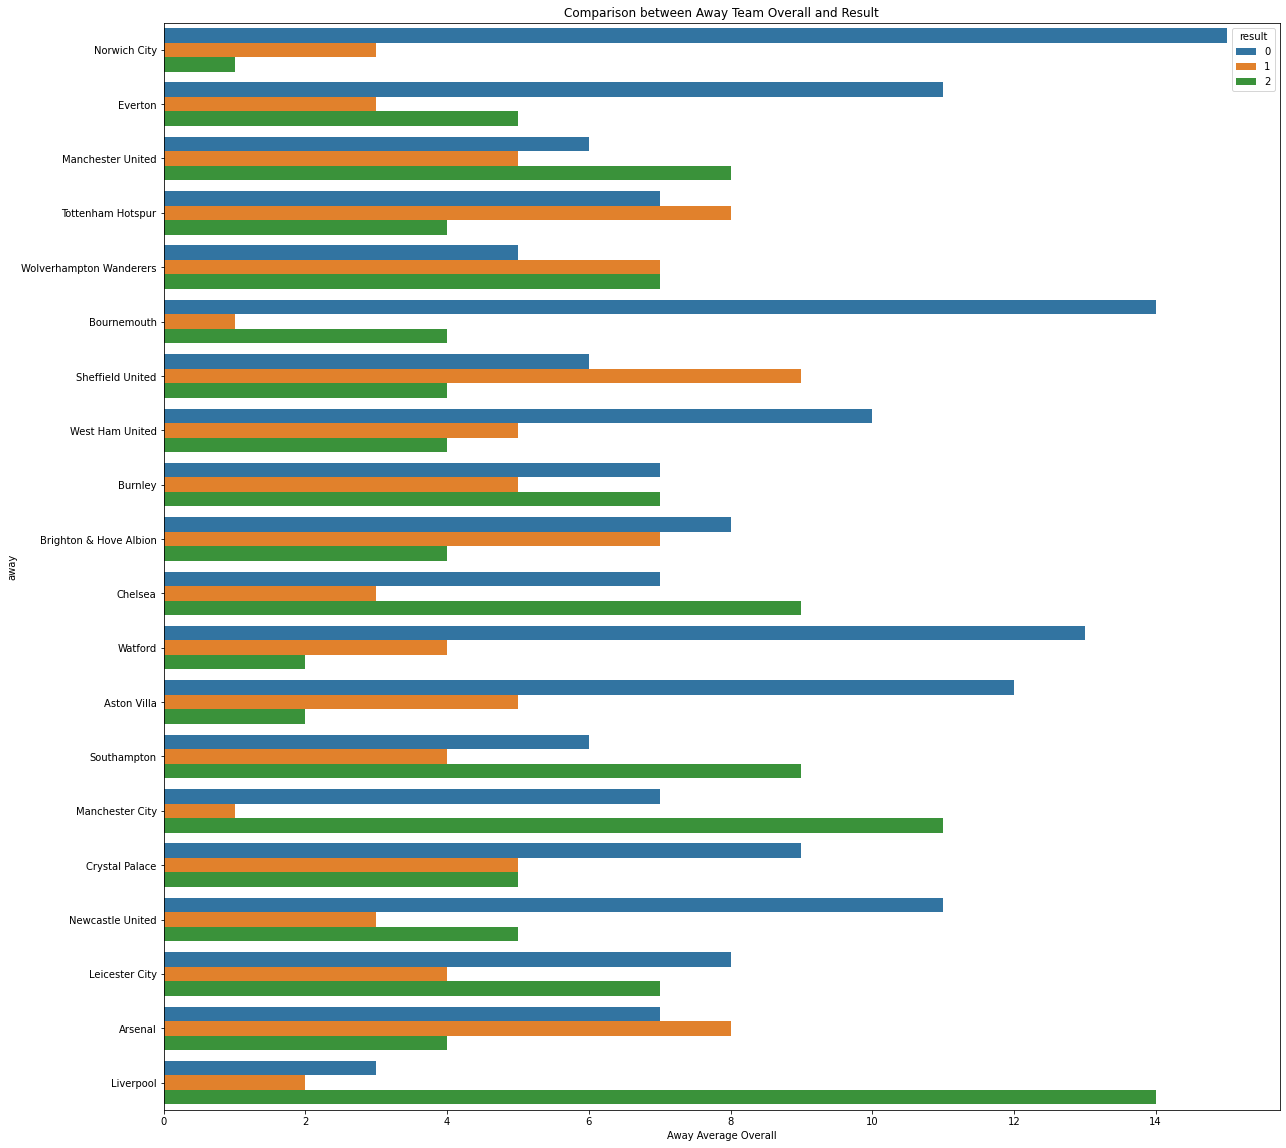

In [75]:
plt.figure(figsize= (20,20))
sns.countplot(data = home_result, y = 'home',hue='result')
plt.xlabel('Home Average Overall')
plt.title('Home Team Result')

plt.figure(figsize= (20,20))
sns.countplot(data = away_result, y = 'away',hue='result')
plt.xlabel('Away Average Overall')
plt.title('Comparison between Away Team Overall and Result')

In [76]:
bpl_fifa20[['club','average_overall']].sort_values('average_overall')

club  average_overall
14         Sheffield United            72.39
13             Norwich City            72.50
1               Aston Villa            73.72
2               Bournemouth            75.67
15              Southampton            75.71
4                   Burnley            75.89
12         Newcastle United            76.00
3    Brighton & Hove Albion            76.25
6            Crystal Palace            76.44
8            Leicester City            77.35
17                  Watford            77.39
19  Wolverhampton Wanderers            77.56
18          West Ham United            78.56
7                   Everton            78.61
0                   Arsenal            79.33
11        Manchester United            80.00
5                   Chelsea            80.22
16        Tottenham Hotspur            82.94
9                 Liverpool            83.28
10          Manchester City            84.50

In season 2019/2020, Liverpool is undefeated at home, and they got the most away wins. Manchester City lost two games at home, whereas winning only eleven away games. The team which lost the most at home and away is Norwich City.

It might be due to Norwich City having a weaker team compared to the rest. Its average overall is 71.89. The team with highest overall is Liverpool and Manchester City. That might also help to explain their results.
